In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
import sklearn
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import random
import warnings
from sklearn.decomposition import PCA


In [85]:
# path = r"C:\Users\venablecrofta\OneDrive - Virginia Tech\Desktop\Classes\S25\Project\PHM08\train.csv"
path =  r"C:\Users\venablecrofta\OneDrive - Virginia Tech\Documents\GitHub\ME_5984-Final-Project\train_FD001.csv"
test_path =  r"C:\Users\venablecrofta\OneDrive - Virginia Tech\Documents\GitHub\ME_5984-Final-Project\test_FD001.csv"

# test_path = r"C:\Users\venablecrofta\OneDrive - Virginia Tech\Desktop\Classes\S25\Project\PHM08\test.csv"
# column_names_1 = ['id', 'cycles', 'setting_1', 'setting_2', 'setting_3']
# column_names_2 = [f"s_{x}" for x in range(1, 22)]
# column_names = column_names_1 + column_names_2


# df_train = pd.read_csv(path, header=None, delimiter=r"\s+")
# df_train.head()

# df_train = df.set_axis(column_names, axis=1)
# df_train.head()
index_names  = ['id', 'cycles']
setting_names  = ['setting_1', 'setting_2', 'setting_3']
sensor_names = [f"s_{x}" for x in range(1, 22)]
col_names = index_names + setting_names + sensor_names

def apply_names (path, column_names):
    df  = pd.read_csv(path, header=None, delimiter =r"\s+", names = column_names)
#     df = df.set_axis(column_names, axis=1)
    return df
df_train = apply_names(path, col_names)
df_test= apply_names(test_path, col_names)

100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         20631 non-null  int64  
 1   cycles     20631 non-null  int64  
 2   setting_1  20631 non-null  float64
 3   setting_2  20631 non-null  float64
 4   setting_3  20631 non-null  float64
 5   s_1        20631 non-null  float64
 6   s_2        20631 non-null  float64
 7   s_3        20631 non-null  float64
 8   s_4        20631 non-null  float64
 9   s_5        20631 non-null  float64
 10  s_6        20631 non-null  float64
 11  s_7        20631 non-null  float64
 12  s_8        20631 non-null  float64
 13  s_9        20631 non-null  float64
 14  s_10       20631 non-null  float64
 15  s_11       20631 non-null  float64
 16  s_12       20631 non-null  float64
 17  s_13       20631 non-null  float64
 18  s_14       20631 non-null  float64
 19  s_15       20631 non-null  float64
 20  s_

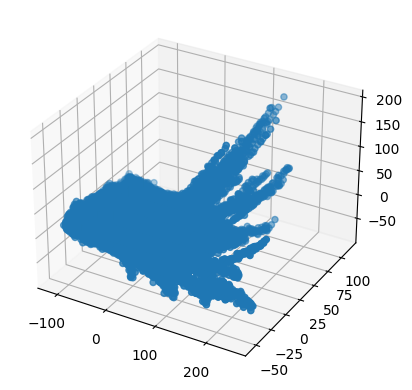

In [22]:
df_train.head()
print(len(df_train['id'].unique()))
df_train.info()
fig =plt.figure()
ax = fig.add_subplot(projection='3d')

pca = PCA(n_components=3)
fit_data = pca.fit_transform(df_train)
ax.scatter(fit_data[:,0],fit_data[:,1], fit_data[:,2])

In [4]:
# ID_RUL = df_train.groupby(['id'])[["id" ,"cycles"]].max()
# ID_RUL.set_index('id', inplace=True)


def RUL_calculator(df, df_max_cycles):
    max_cycle = df_max_cycles["cycles"]
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='id', right_index=True)
    result_frame["RUL"] = result_frame["max_cycle"] - result_frame["cycles"] 
    result_frame.drop(['max_cycle'], axis=1, inplace=True)
    return result_frame

# df_train = RUL_calculator(df_train, ID_RUL)
# df_train.describe()
df_train.head()


id  cycles  setting_1  setting_2  setting_3     s_1     s_2      s_3  \
0   1       1    -0.0007    -0.0004      100.0  518.67  641.82  1589.70   
1   1       2     0.0019    -0.0003      100.0  518.67  642.15  1591.82   
2   1       3    -0.0043     0.0003      100.0  518.67  642.35  1587.99   
3   1       4     0.0007     0.0000      100.0  518.67  642.35  1582.79   
4   1       5    -0.0019    -0.0002      100.0  518.67  642.37  1582.85   

       s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  s_17  s_18  \
0  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03   392  2388   
1  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03   392  2388   
2  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03   390  2388   
3  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03   392  2388   
4  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03   393  2388   

    s_19   s_20     s_21  
0  100.0  39.06  23.4190  
1  100.0  39.00  23.4236  
2  100.0  38.95  23.3442  
3  100.0  38.88  23.3739  
4  100.0  38.90  23.4044  

[5 rows x 26 columns]

In [86]:
df_train_RUL = df_train.groupby(['id']).agg({'cycles':'max'})
df_train_RUL.rename(columns={'cycles':'life'},inplace=True)
df_train_RUL.head()

df_train=df_train.merge(df_train_RUL,how='left',on=['id'])
df_train['RUL']=df_train['life']-df_train['cycles']
df_train.drop(['life'],axis=1,inplace=True)
# df_train['RUL'][df_train['RUL']>125]=125
df_train.head()

id  cycles  setting_1  setting_2  setting_3     s_1     s_2      s_3  \
0   1       1    -0.0007    -0.0004      100.0  518.67  641.82  1589.70   
1   1       2     0.0019    -0.0003      100.0  518.67  642.15  1591.82   
2   1       3    -0.0043     0.0003      100.0  518.67  642.35  1587.99   
3   1       4     0.0007     0.0000      100.0  518.67  642.35  1582.79   
4   1       5    -0.0019    -0.0002      100.0  518.67  642.37  1582.85   

       s_4    s_5  ...     s_13     s_14    s_15  s_16  s_17  s_18   s_19  \
0  1400.60  14.62  ...  2388.02  8138.62  8.4195  0.03   392  2388  100.0   
1  1403.14  14.62  ...  2388.07  8131.49  8.4318  0.03   392  2388  100.0   
2  1404.20  14.62  ...  2388.03  8133.23  8.4178  0.03   390  2388  100.0   
3  1401.87  14.62  ...  2388.08  8133.83  8.3682  0.03   392  2388  100.0   
4  1406.22  14.62  ...  2388.04  8133.80  8.4294  0.03   393  2388  100.0   

    s_20     s_21  RUL  
0  39.06  23.4190  191  
1  39.00  23.4236  190  
2  38.95  23.3442  189  
3  38.88  23.3739  188  
4  38.90  23.4044  187  

[5 rows x 27 columns]

In [87]:
df_test_RUL = df_test.groupby(['id']).agg({'cycles':'max'})
df_test_RUL.rename(columns={'cycles':'life'},inplace=True)
df_test_RUL.head()

df_test=df_test.merge(df_test_RUL,how='left',on=['id'])
df_test['RUL']=df_test['life']-df_train['cycles']
df_test.drop(['life'],axis=1,inplace=True)
df_test.head()

id  cycles  setting_1  setting_2  setting_3     s_1     s_2      s_3  \
0   1       1     0.0023     0.0003      100.0  518.67  643.02  1585.29   
1   1       2    -0.0027    -0.0003      100.0  518.67  641.71  1588.45   
2   1       3     0.0003     0.0001      100.0  518.67  642.46  1586.94   
3   1       4     0.0042     0.0000      100.0  518.67  642.44  1584.12   
4   1       5     0.0014     0.0000      100.0  518.67  642.51  1587.19   

       s_4    s_5  ...     s_13     s_14    s_15  s_16  s_17  s_18   s_19  \
0  1398.21  14.62  ...  2388.03  8125.55  8.4052  0.03   392  2388  100.0   
1  1395.42  14.62  ...  2388.06  8139.62  8.3803  0.03   393  2388  100.0   
2  1401.34  14.62  ...  2388.03  8130.10  8.4441  0.03   393  2388  100.0   
3  1406.42  14.62  ...  2388.05  8132.90  8.3917  0.03   391  2388  100.0   
4  1401.92  14.62  ...  2388.03  8129.54  8.4031  0.03   390  2388  100.0   

    s_20     s_21   RUL  
0  38.86  23.3735  30.0  
1  39.02  23.3916  29.0  
2  39.08  23.4166  28.0  
3  39.00  23.3737  27.0  
4  38.99  23.4130  26.0  

[5 rows x 27 columns]

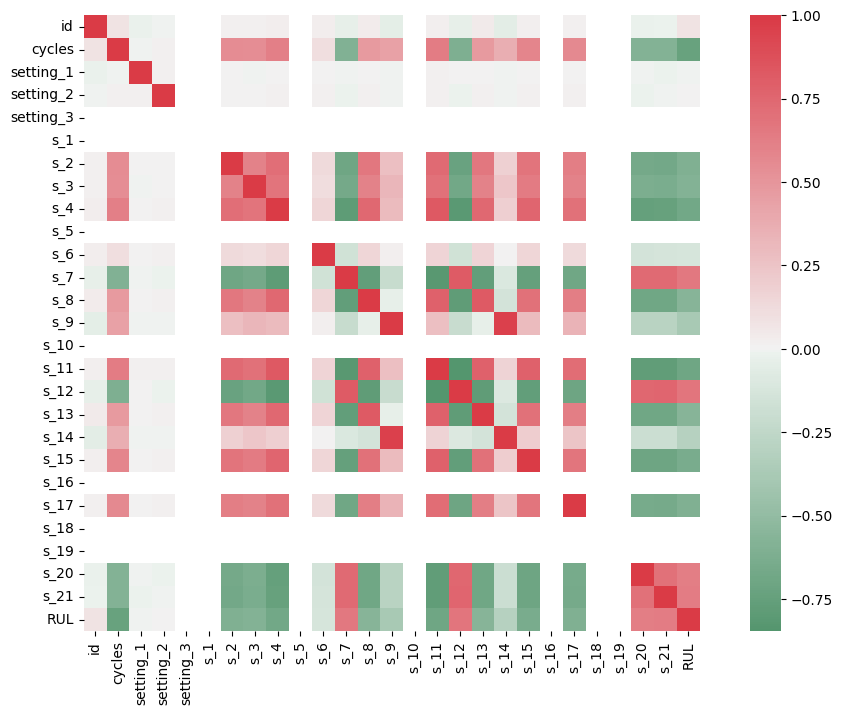

In [7]:
plt.figure(figsize=(13,8))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(df_train.corr(), cmap =cmap, center=0, annot=False, square=True);

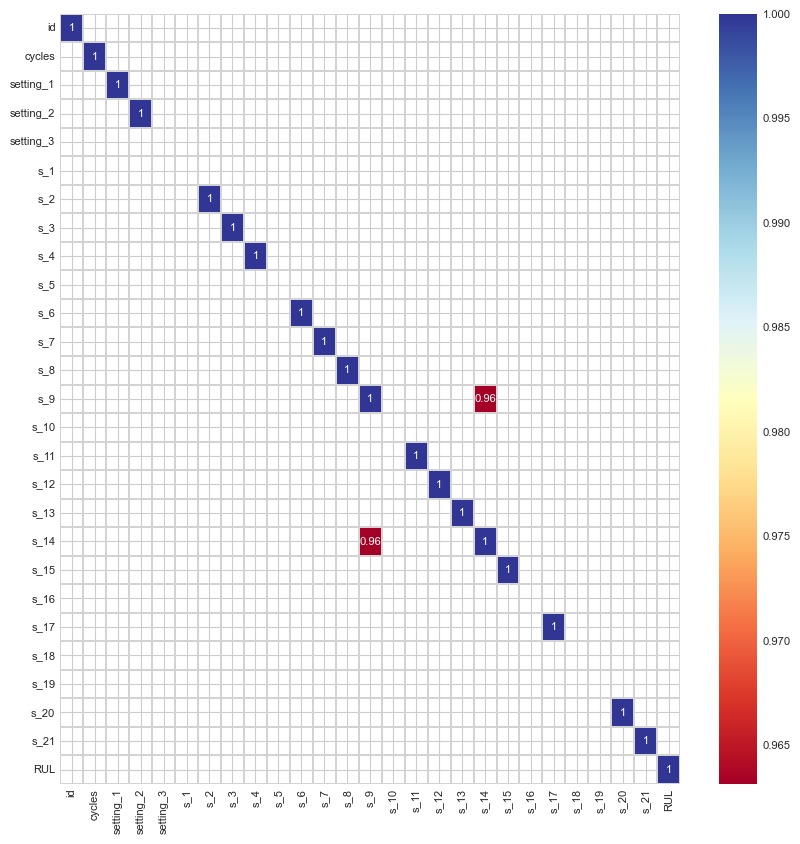

In [72]:
plt.figure(figsize=(10,10))
threshold = 0.90
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')

In [89]:
# sens_const_values = []
# for feature in list(col_names):
#     try:
#         if df_train[feature].min()==df_train[feature].max():
#             sens_const_values.append(feature)
#     except:
#         pass

scaler = MinMaxScaler()

# Scale only the sensor columns for training and test data
df_train_scaled_sensors = scaler.fit_transform(df_train[sensor_names])
df_test_scaled_sensors = scaler.transform(df_test[sensor_names])

# Create new DataFrames with only the scaled sensor data
scaled_sensors_train = pd.DataFrame(df_train_scaled_sensors, columns=sensor_names)
scaled_sensors_test = pd.DataFrame(df_test_scaled_sensors, columns=sensor_names)

# Combine with the non-sensor columns from the original DataFrames
normalized_train = pd.concat([
    df_train.drop(columns=sensor_names).reset_index(drop=True),
    scaled_sensors_train
], axis=1)

normalized_test = pd.concat([
    df_test.drop(columns=sensor_names).reset_index(drop=True),
    scaled_sensors_test
], axis=1)

# Now you can drop the columns you don't want
columns_to_drop = ['cycles', 'setting_1', 'setting_2', 'setting_3', 's_1', 's_5', 's_6', 's_10', 's_16', 's_18', 's_19']
df_train_copy = normalized_train.drop(columns=columns_to_drop)

df_train_copy.head()

id  RUL       s_2       s_3       s_4       s_7       s_8       s_9  \
0   1  191  0.183735  0.406802  0.309757  0.726248  0.242424  0.109755   
1   1  190  0.283133  0.453019  0.352633  0.628019  0.212121  0.100242   
2   1  189  0.343373  0.369523  0.370527  0.710145  0.272727  0.140043   
3   1  188  0.343373  0.256159  0.331195  0.740741  0.318182  0.124518   
4   1  187  0.349398  0.257467  0.404625  0.668277  0.242424  0.149960   

       s_11      s_12      s_13      s_14      s_15      s_17      s_20  \
0  0.369048  0.633262  0.205882  0.199608  0.363986  0.333333  0.713178   
1  0.380952  0.765458  0.279412  0.162813  0.411312  0.333333  0.666667   
2  0.250000  0.795309  0.220588  0.171793  0.357445  0.166667  0.627907   
3  0.166667  0.889126  0.294118  0.174889  0.166603  0.333333  0.573643   
4  0.255952  0.746269  0.235294  0.174734  0.402078  0.416667  0.589147   

       s_21  
0  0.724662  
1  0.731014  
2  0.621375  
3  0.662386  
4  0.704502

In [91]:

df_test_copy= normalized_test.drop(columns=columns_to_drop)
df_test_copy.head()

id   RUL       s_2       s_3       s_4       s_7       s_8       s_9  \
0   1  30.0  0.545181  0.310661  0.269413  0.652174  0.212121  0.127614   
1   1  29.0  0.150602  0.379551  0.222316  0.805153  0.166667  0.146684   
2   1  28.0  0.376506  0.346632  0.322248  0.685990  0.227273  0.158081   
3   1  27.0  0.370482  0.285154  0.408001  0.679549  0.196970  0.105717   
4   1  26.0  0.391566  0.352082  0.332039  0.694042  0.166667  0.102396   

       s_11      s_12      s_13      s_14      s_15      s_17      s_20  \
0  0.208333  0.646055  0.220588  0.132160  0.308965  0.333333  0.558140   
1  0.386905  0.739872  0.264706  0.204768  0.213159  0.416667  0.682171   
2  0.386905  0.699360  0.220588  0.155640  0.458638  0.416667  0.728682   
3  0.255952  0.573561  0.250000  0.170090  0.257022  0.250000  0.666667   
4  0.273810  0.737740  0.220588  0.152751  0.300885  0.166667  0.658915   

       s_21  
0  0.661834  
1  0.686827  
2  0.721348  
3  0.662110  
4  0.716377

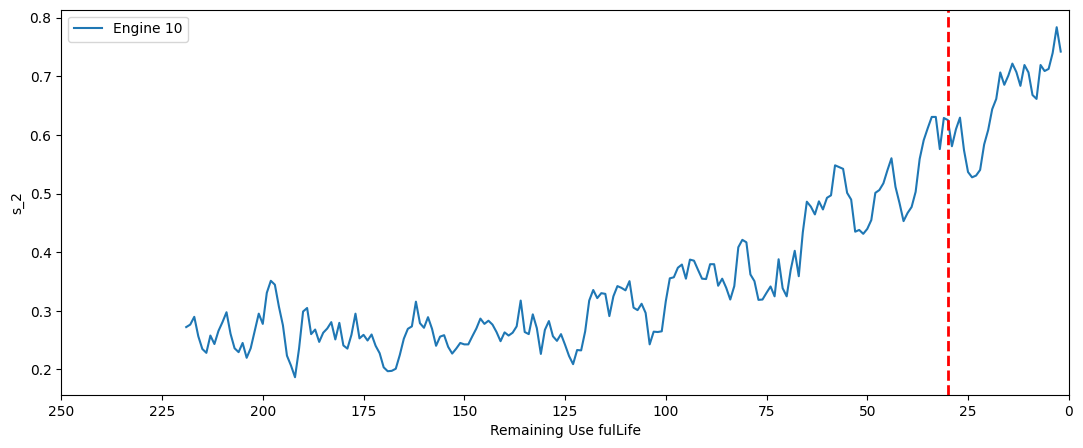

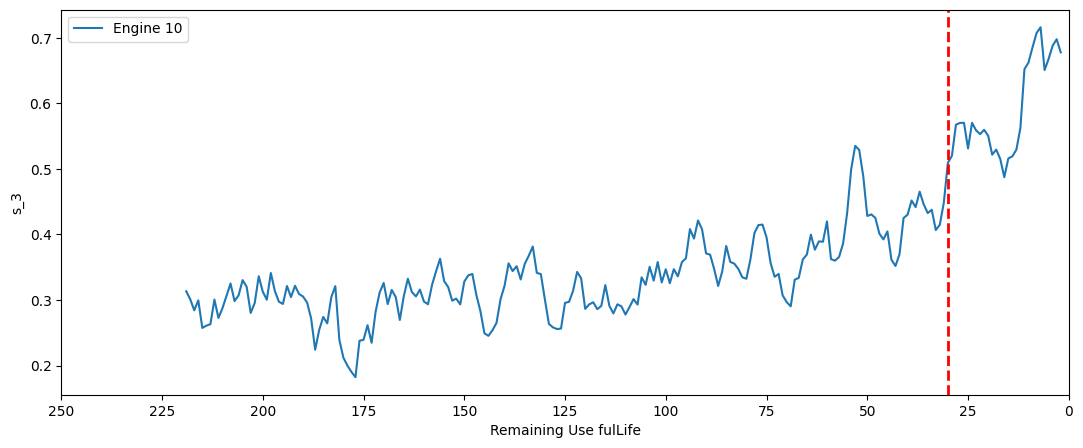

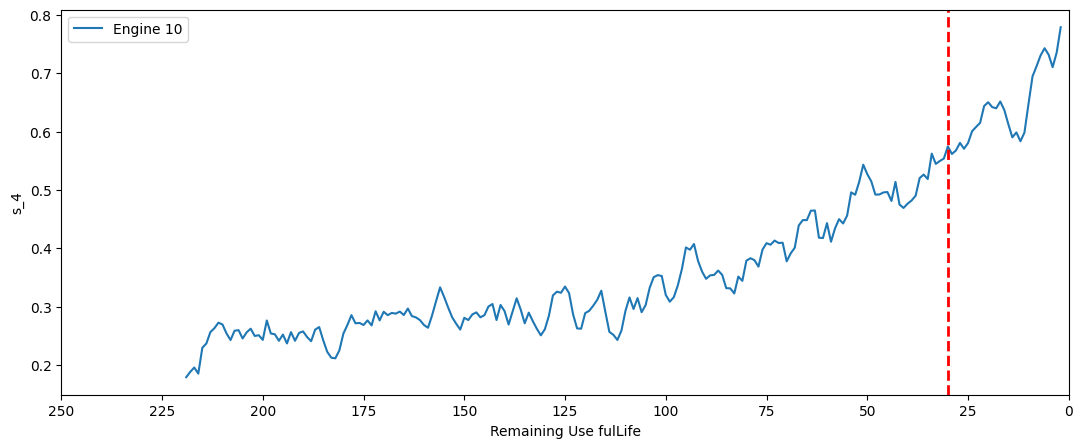

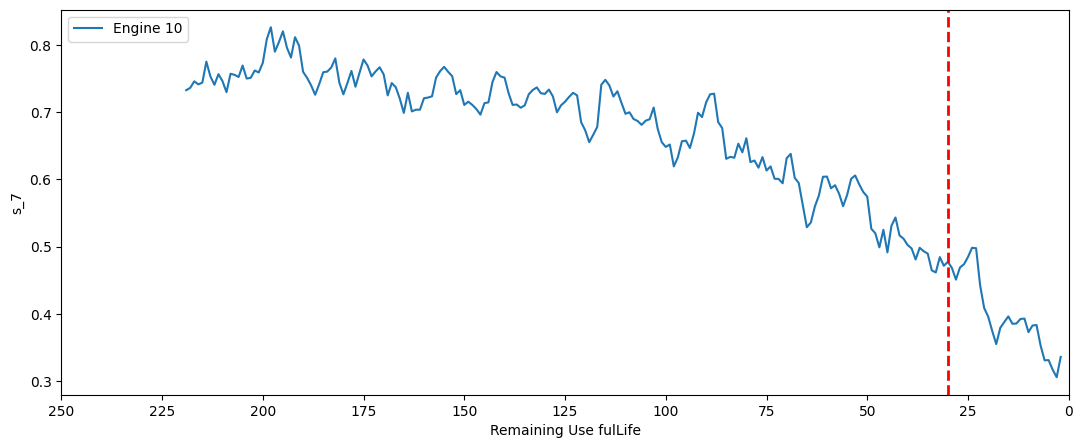

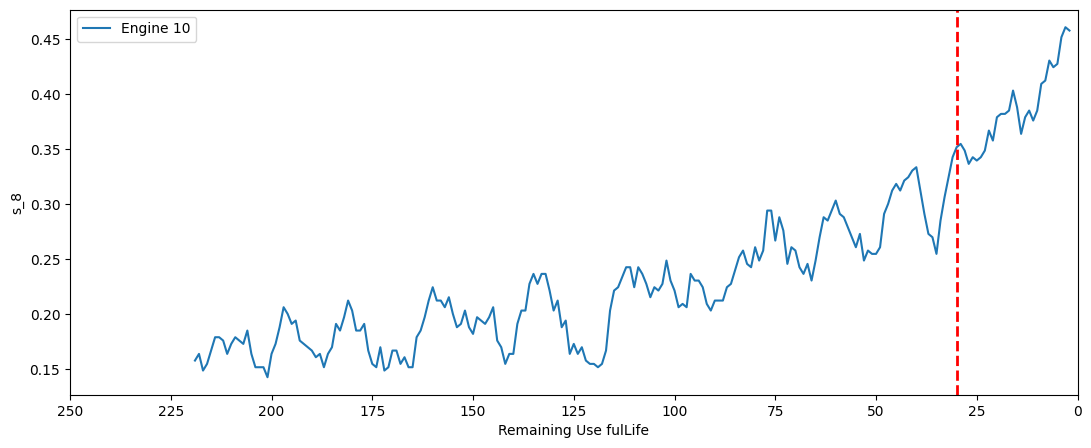

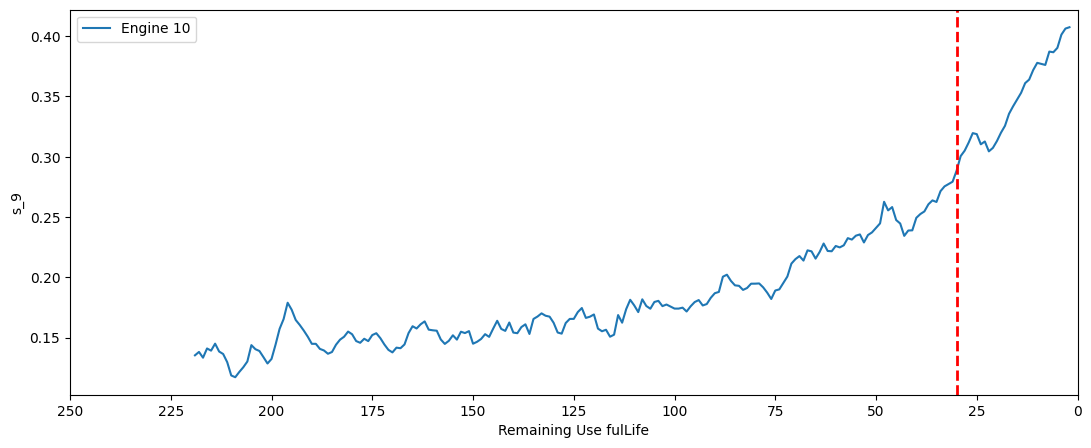

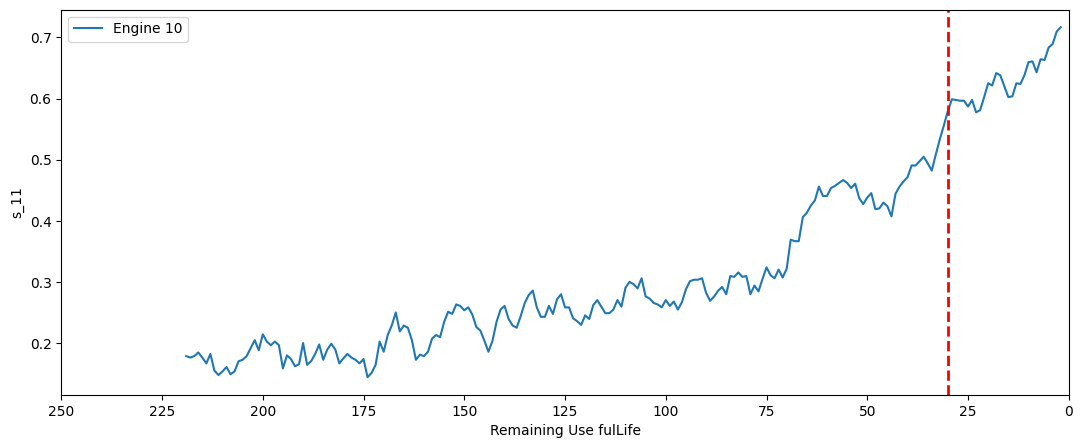

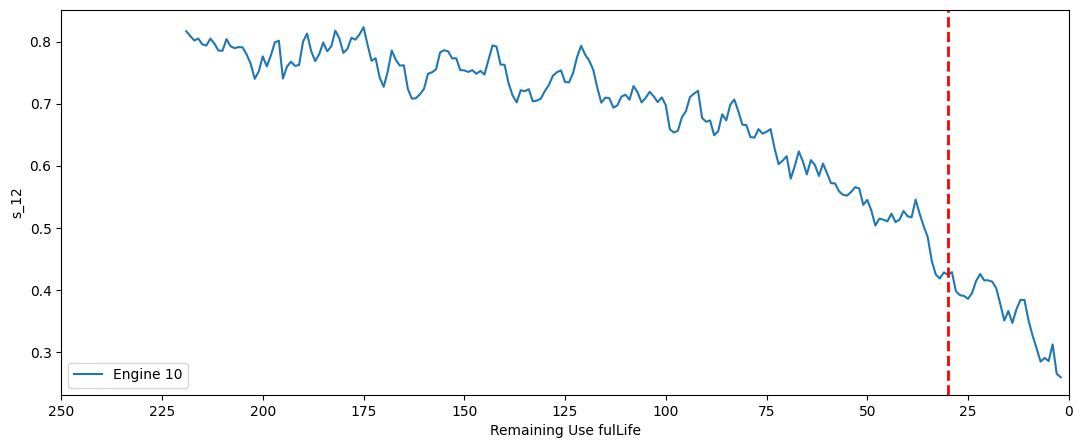

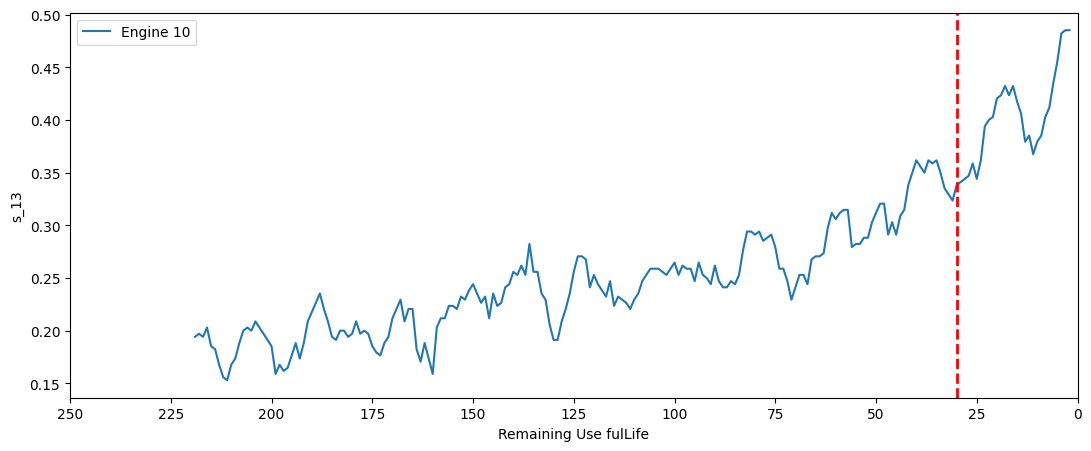

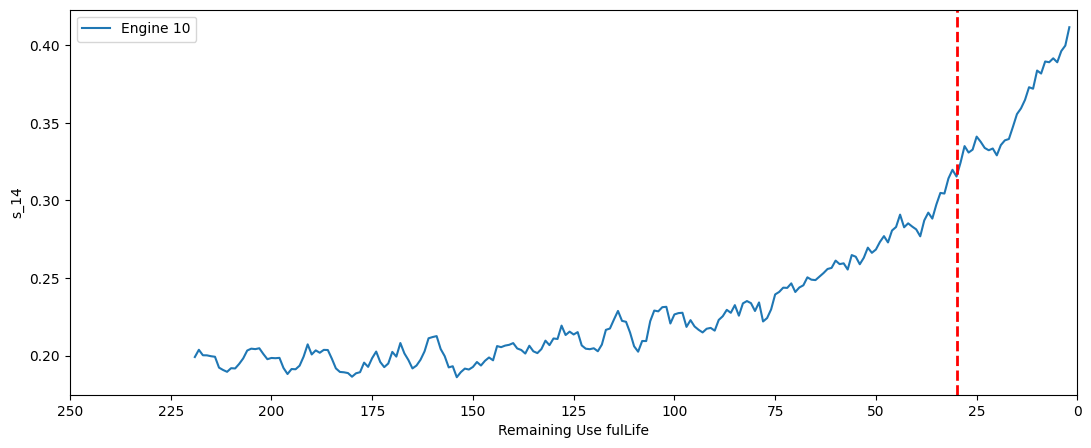

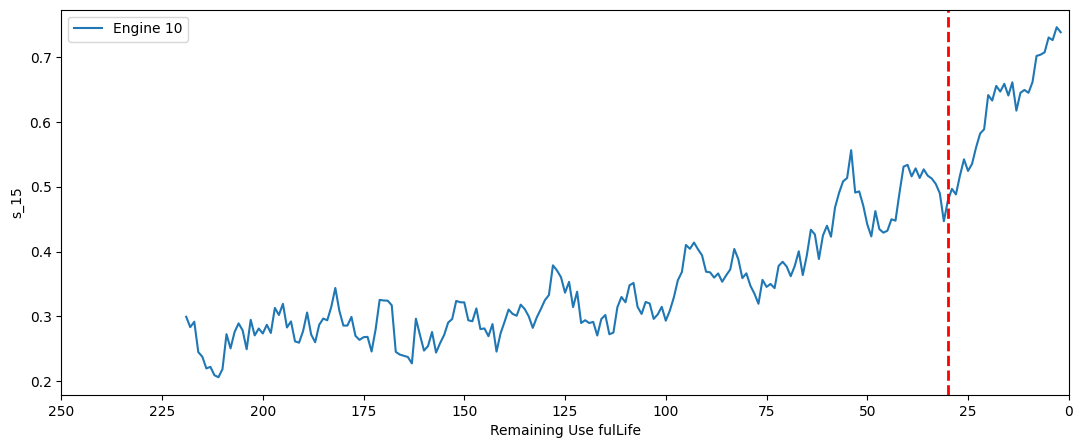

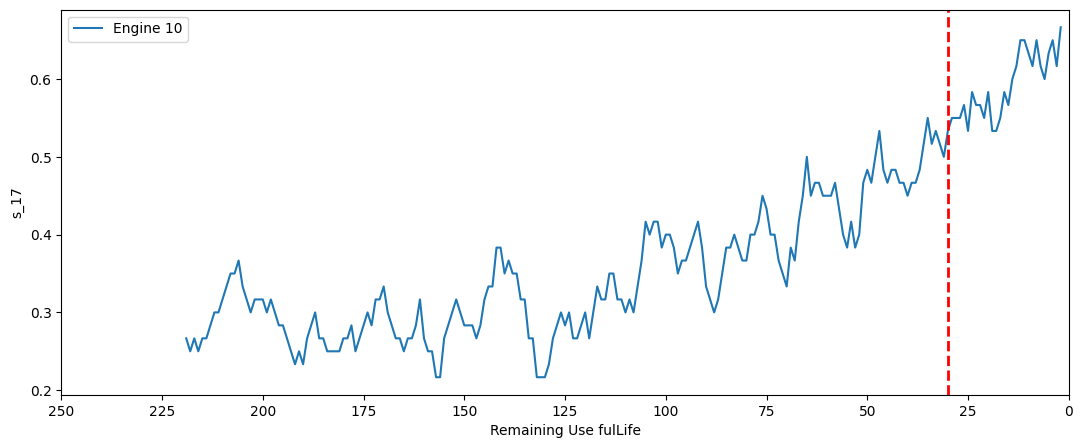

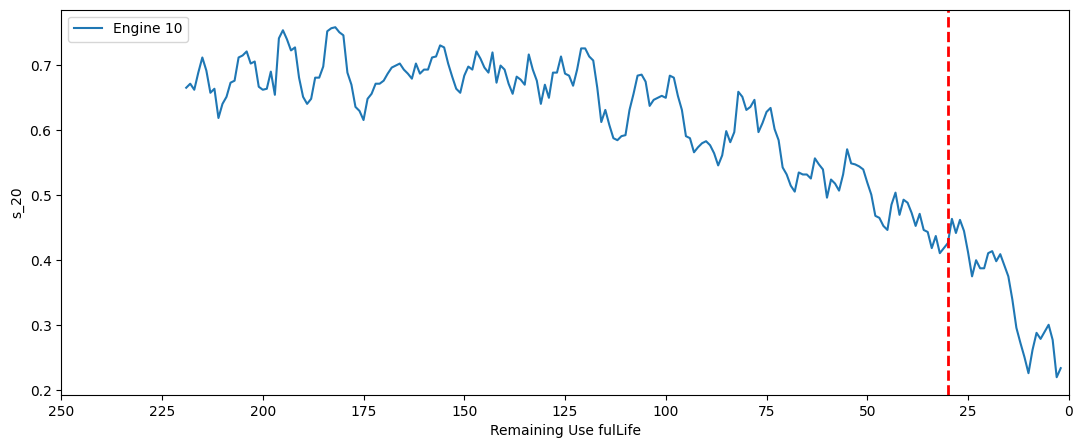

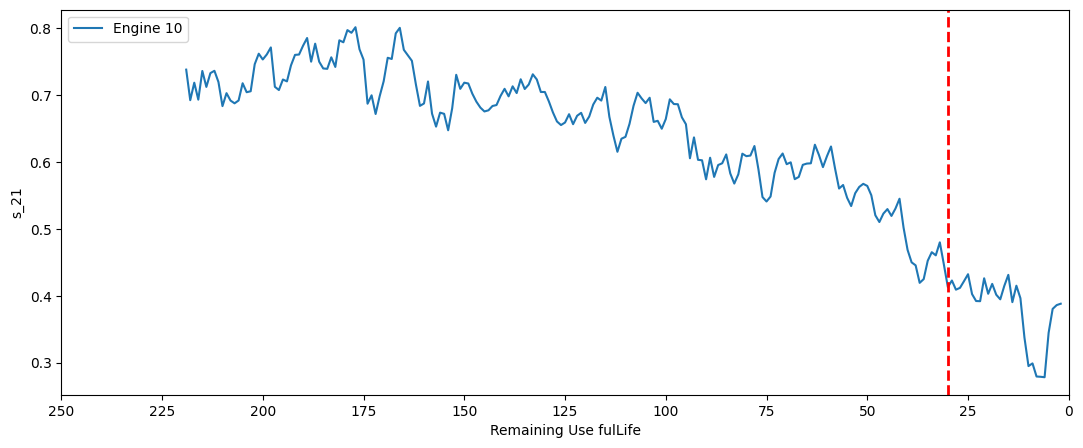

In [92]:
def plot_sensor(sensor_name,X):
    plt.figure(figsize=(13,5))
    for i in X['id'].unique():
        if i == 10:
#             continue
#         if (i % 10 == 0):  # only plot every engine
            plt.plot('RUL', sensor_name, 
                     data=X[X['id']==i].rolling(5).mean(), alpha = 1, label = f'Engine {i}')
            plt.axvline(30, color='red', linestyle='dashed', linewidth=2)
    plt.rcParams['figure.facecolor'] = 'white'
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Use fulLife')
    plt.legend()
    plt.show()
    

for sensor in df_train_copy.drop(['id', 'RUL'], axis=1).columns:
    plot_sensor(sensor, df_train_copy)

In [ ]:
df_train_copy.drop('s_9', axis = 1, inplace = True)

In [26]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(df_train_copy)


[[-1.72808356 -1.72172539 -0.13425518 ...  1.34849274  1.19442705
   1.20779556]
 [-1.72808356 -1.06177971  0.21152849 ...  1.01652793  1.23692196
   1.19327742]
 [-1.72808356 -0.66181262 -0.41316559 ...  0.73989059  0.50342281
   1.17875927]
 ...
 [ 1.65920407  1.47801126  1.94697106 ... -2.08181033 -3.29248147
  -1.53613393]
 [ 1.65920407  1.09804254  2.40366648 ... -2.91172236 -2.08507166
  -1.55065208]
 [ 1.65920407  2.33794049  1.60771161 ... -2.46910261 -2.19408035
  -1.56517022]]


(287, 3)
(189, 3)
(188, 3)
(150, 3)
(222, 3)
(170, 3)
(180, 3)
(209, 3)
(195, 3)
(234, 3)
(202, 3)
(147, 3)
(199, 3)
(165, 3)
(194, 3)
(191, 3)
(195, 3)
(158, 3)
(194, 3)
(188, 3)
(196, 3)
(192, 3)
(256, 3)
(231, 3)
(198, 3)
(213, 3)
(257, 3)
(275, 3)
(147, 3)
(172, 3)
(180, 3)
(283, 3)
(202, 3)
(199, 3)
(137, 3)
(213, 3)
(166, 3)
(210, 3)
(231, 3)
(185, 3)
(214, 3)
(267, 3)
(278, 3)
(213, 3)
(154, 3)
(341, 3)
(258, 3)
(336, 3)
(156, 3)
(200, 3)


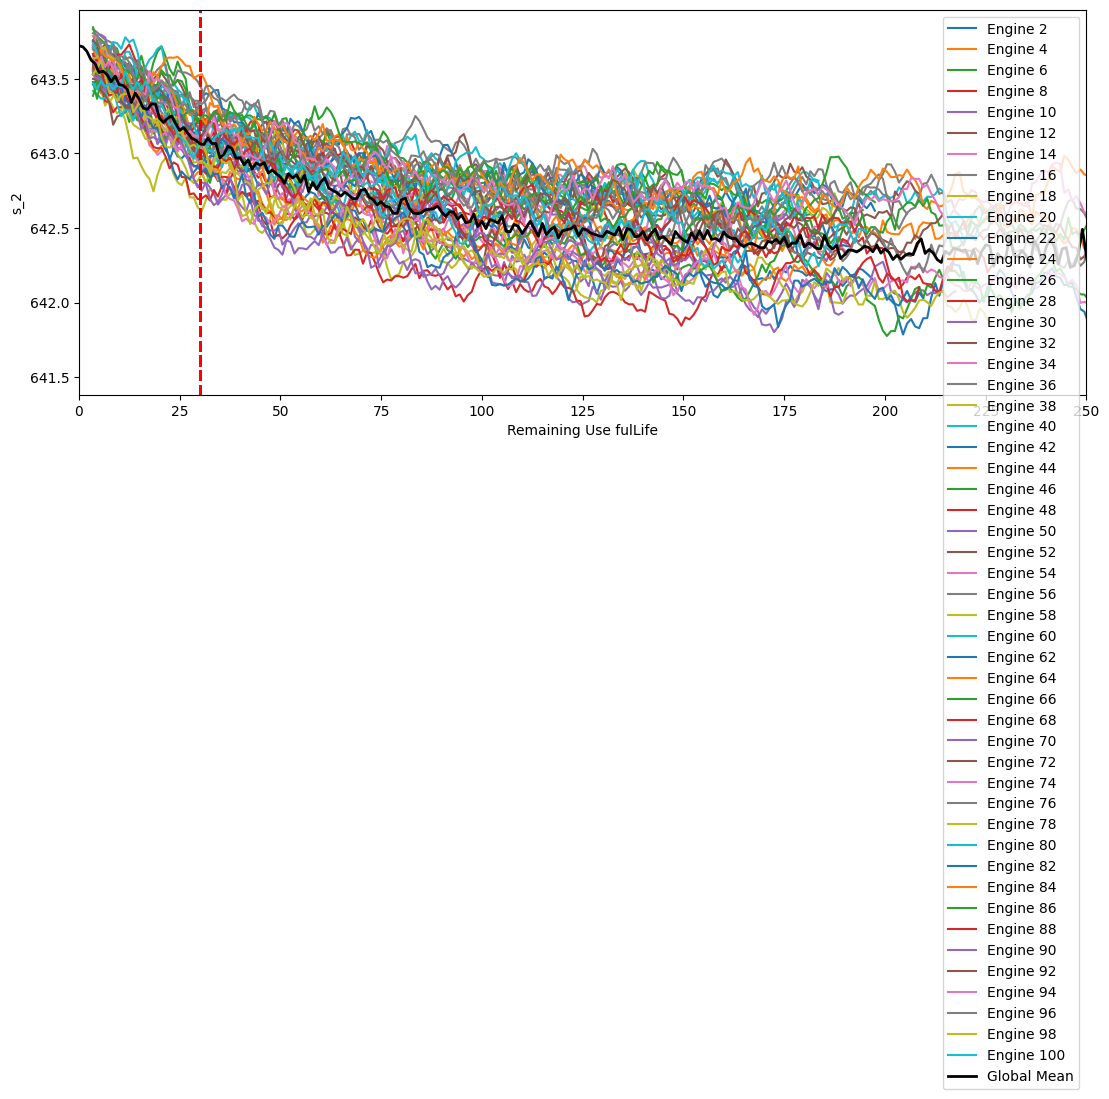

In [26]:
from sklearn.preprocessing import PolynomialFeatures

sensor_cols = [col for col in df_train_copy.columns if col.startswith('s_')]

# Design matrix X (sensors)
sensor_name = 's_2'
X_raw= df_train[['id','s_2','RUL']]# shape (num_samples, num_sensors)

plt.figure(figsize=(13,5))
for i in X_raw['id'].unique():
        if (i % 2 == 0):  # only plot every engine
            single_engine = X_raw[X_raw['id']==i].rolling(8).mean()
            print(np.shape(single_engine))
            plt.plot('RUL', sensor_name, 
                     data=single_engine, alpha = 1, label = f'Engine {i}')
            plt.axvline(30, color='red', linestyle='dashed', linewidth=2)
global_mean = X_raw.groupby('RUL')[sensor_name].mean()
plt.plot(global_mean.index, global_mean, color='black', label='Global Mean', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
plt.xlim(0, 250)  # reverse the x-axis so RUL counts down to zero
plt.xticks(np.arange(0, 275, 25))
plt.ylabel(sensor_name)
plt.xlabel('Remaining Use fulLife')
plt.legend()
plt.show()

In [93]:
# x = np.linspace(250, 0, 20)
# X = np.vstack([x**i for i in range(5)]).T


     id  RUL       s_2       s_3       s_4       s_7       s_8       s_9  \
192   2  286  0.204819  0.279049  0.152431  0.753623  0.166667  0.148030   
193   2  285  0.183735  0.349030  0.183660  0.792271  0.121212  0.132729   
194   2  284  0.102410  0.376717  0.282073  0.851852  0.212121  0.145876   
195   2  283  0.141566  0.285808  0.233457  0.708535  0.121212  0.162793   
196   2  282  0.156627  0.174188  0.342167  0.848631  0.196970  0.163421   
..   ..  ...       ...       ...       ...       ...       ...       ...   
474   2    4  0.774096  0.675605  0.800473  0.259259  0.393939  0.279996   
475   2    3  0.813253  0.660780  0.806718  0.339775  0.484848  0.305752   
476   2    2  0.740964  0.562459  0.825793  0.161031  0.454545  0.345239   
477   2    1  0.671687  0.710486  0.798785  0.283414  0.424242  0.360226   
478   2    0  0.795181  0.816656  0.820223  0.291465  0.454545  0.393206   

         s_11      s_12      s_13      s_14      s_15      s_17      s_20  \
192  0.047

      id  RUL       s_2       s_3       s_4       s_7       s_8       s_9  \
1914  10  221  0.213855  0.368215  0.167961  0.727858  0.151515  0.133402   
1915  10  220  0.304217  0.343798  0.165091  0.790660  0.242424  0.158395   
1916  10  219  0.286145  0.218443  0.223835  0.735910  0.166667  0.115409   
1917  10  218  0.280120  0.417048  0.099595  0.698873  0.136364  0.160190   
1918  10  217  0.277108  0.219097  0.238352  0.710145  0.090909  0.109620   
...   ..  ...       ...       ...       ...       ...       ...       ...   
2131  10    4  0.750000  0.601700  0.742066  0.257649  0.393939  0.388450   
2132  10    3  0.677711  0.708524  0.713876  0.351047  0.378788  0.411334   
2133  10    2  0.677711  0.738391  0.683828  0.302738  0.530303  0.419187   
2134  10    1  0.867470  0.727273  0.841999  0.309179  0.500000  0.397738   
2135  10    0  0.737952  0.613473  0.912221  0.458937  0.484848  0.420488   

          s_11      s_12      s_13      s_14      s_15      s_17      s_20 

      id  RUL       s_2       s_3       s_4       s_7       s_8       s_9  \
3581  18  194  0.385542  0.259647  0.326637  0.763285  0.075758  0.177555   
3582  18  193  0.301205  0.400044  0.265530  0.695652  0.166667  0.174549   
3583  18  192  0.358434  0.424460  0.296084  0.797101  0.212121  0.207754   
3584  18  191  0.322289  0.137345  0.196995  0.597424  0.212121  0.134030   
3585  18  190  0.081325  0.317201  0.280891  0.747182  0.196970  0.152069   
...   ..  ...       ...       ...       ...       ...       ...       ...   
3771  18    4  0.716867  0.773272  0.695814  0.278583  0.333333  0.827784   
3772  18    3  0.608434  0.695008  0.741053  0.383253  0.363636  0.819842   
3773  18    2  0.807229  0.697406  0.698852  0.381643  0.454545  0.849053   
3774  18    1  0.855422  0.838893  0.695307  0.268921  0.348485  0.905636   
3775  18    0  0.819277  0.653150  0.773633  0.254428  0.818182  0.909988   

          s_11      s_12      s_13      s_14      s_15      s_17      s_20 

      id  RUL       s_2       s_3       s_4       s_7       s_8       s_9  \
5110  26  198  0.388554  0.447133  0.492573  0.495974  0.363636  0.087319   
5111  26  197  0.361446  0.409854  0.392640  0.524960  0.348485  0.088666   
5112  26  196  0.427711  0.373229  0.448346  0.557166  0.287879  0.092076   
5113  26  195  0.578313  0.493351  0.465901  0.536232  0.348485  0.102576   
5114  26  194  0.478916  0.383039  0.539163  0.587762  0.454545  0.062640   
...   ..  ...       ...       ...       ...       ...       ...       ...   
5304  26    4  0.686747  0.804011  0.676570  0.346216  0.393939  0.555775   
5305  26    3  0.710843  0.706562  0.758440  0.349436  0.363636  0.615274   
5306  26    2  0.852410  0.681273  0.751688  0.222222  0.393939  0.579557   
5307  26    1  0.611446  0.625463  0.659014  0.276973  0.439394  0.593512   
5308  26    0  0.692771  0.614999  0.848244  0.312399  0.439394  0.618236   

          s_11      s_12      s_13      s_14      s_15      s_17      s_20 

      id  RUL       s_2       s_3       s_4       s_7       s_8       s_9  \
6612  34  194  0.370482  0.344452  0.432984  0.597424  0.257576  0.164184   
6613  34  193  0.286145  0.313713  0.375760  0.607085  0.333333  0.186260   
6614  34  192  0.500000  0.369305  0.351452  0.790660  0.257576  0.169030   
6615  34  191  0.304217  0.448005  0.311951  0.645733  0.363636  0.145203   
6616  34  190  0.144578  0.415086  0.376435  0.723027  0.257576  0.125684   
...   ..  ...       ...       ...       ...       ...       ...       ...   
6802  34    4  0.789157  0.654894  0.834402  0.378422  0.363636  0.598447   
6803  34    3  0.698795  0.681491  0.772620  0.352657  0.363636  0.639415   
6804  34    2  0.722892  0.677785  0.717589  0.302738  0.439394  0.637934   
6805  34    1  0.671687  0.659036  0.741729  0.257649  0.424242  0.647626   
6806  34    0  0.822289  0.582080  0.875084  0.259259  0.409091  0.631966   

          s_11      s_12      s_13      s_14      s_15      s_17      s_20 

C:\Users\venablecrofta\AppData\Local\Temp\ipykernel_964\1099409525.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


      id  RUL       s_2       s_3       s_4       s_7       s_8       s_9  \
8795  46  255  0.349398  0.574232  0.153950  0.655395  0.212121  0.185363   
8796  46  254  0.126506  0.224330  0.466914  0.726248  0.196970  0.161895   
8797  46  253  0.337349  0.171572  0.258103  0.607085  0.121212  0.156690   
8798  46  252  0.237952  0.264007  0.239196  0.837359  0.166667  0.204344   
8799  46  251  0.186747  0.335949  0.270088  0.636071  0.151515  0.160594   
...   ..  ...       ...       ...       ...       ...       ...       ...   
9046  46    4  0.762048  0.724875  0.739028  0.220612  0.590909  0.141883   
9047  46    3  0.921687  0.660780  0.726705  0.157810  0.606061  0.137934   
9048  46    2  0.810241  0.543056  0.808069  0.104670  0.484848  0.144710   
9049  46    1  0.765060  0.677131  0.805706  0.146538  0.530303  0.159427   
9050  46    0  0.972892  0.687377  0.873396  0.144928  0.530303  0.090864   

          s_11      s_12      s_13      s_14      s_15      s_17      s_20 

       id  RUL       s_2       s_3       s_4       s_7       s_8       s_9  \
11770  60  171  0.433735  0.319817  0.210162  0.689211  0.363636  0.100826   
11771  60  170  0.364458  0.491389  0.300135  0.576490  0.272727  0.159068   
11772  60  169  0.418675  0.480706  0.483795  0.494364  0.287879  0.149511   
11773  60  168  0.587349  0.392849  0.340817  0.621578  0.272727  0.146190   
11774  60  167  0.259036  0.324395  0.402093  0.565217  0.348485  0.170017   
...    ..  ...       ...       ...       ...       ...       ...       ...   
11937  60    4  0.620482  0.748855  0.715901  0.344605  0.439394  0.444405   
11938  60    3  0.539157  0.735993  0.770425  0.310789  0.469697  0.499103   
11939  60    2  0.695783  0.749727  0.777346  0.349436  0.439394  0.493045   
11940  60    1  0.810241  0.623283  0.706617  0.241546  0.409091  0.549044   
11941  60    0  0.725904  0.744495  0.875084  0.219002  0.424242  0.537288   

           s_11      s_12      s_13      s_14      s_15      s_

       id  RUL       s_2       s_3       s_4       s_7       s_8       s_9  \
14338  72  212  0.466867  0.223022  0.265530  0.713366  0.287879  0.131652   
14339  72  211  0.397590  0.441901  0.396354  0.619968  0.242424  0.102486   
14340  72  210  0.355422  0.373883  0.339635  0.642512  0.212121  0.095531   
14341  72  209  0.331325  0.236756  0.203747  0.753623  0.303030  0.120031   
14342  72  208  0.500000  0.282320  0.315665  0.753623  0.242424  0.113031   
...    ..  ...       ...       ...       ...       ...       ...       ...   
14546  72    4  0.933735  0.596032  0.808913  0.294686  0.666667  0.019923   
14547  72    3  0.629518  0.751254  0.781229  0.331723  0.590909  0.036570   
14548  72    2  0.756024  0.638544  0.790682  0.125604  0.666667  0.058422   
14549  72    1  0.810241  0.603663  0.911377  0.133655  0.606061  0.029211   
14550  72    0  0.813253  0.581644  0.769581  0.167472  0.636364  0.050884   

           s_11      s_12      s_13      s_14      s_15      s_

       id  RUL       s_2       s_3       s_4       s_7       s_8       s_9  \
15953  80  184  0.436747  0.376281  0.168805  0.555556  0.409091  0.138248   
15954  80  183  0.403614  0.421408  0.533086  0.721417  0.272727  0.116127   
15955  80  182  0.725904  0.342272  0.445138  0.658615  0.333333  0.150498   
15956  80  181  0.551205  0.404622  0.505402  0.536232  0.348485  0.117383   
15957  80  180  0.268072  0.352954  0.436867  0.497585  0.348485  0.158261   
...    ..  ...       ...       ...       ...       ...       ...       ...   
16133  80    4  0.840361  0.724221  0.787812  0.384863  0.454545  0.555910   
16134  80    3  0.783133  0.594724  0.743754  0.281804  0.393939  0.621466   
16135  80    2  0.686747  0.704818  0.878629  0.310789  0.333333  0.588307   
16136  80    1  0.789157  0.696970  0.809926  0.310789  0.409091  0.638832   
16137  80    0  0.804217  0.770438  0.661040  0.273752  0.484848  0.667863   

           s_11      s_12      s_13      s_14      s_15      s_

       id  RUL       s_2       s_3       s_4       s_7       s_8       s_9  \
18515  92  340  0.304217  0.453891  0.331533  0.584541  0.303030  0.161581   
18516  92  339  0.379518  0.070198  0.213707  0.660225  0.166667  0.138069   
18517  92  338  0.415663  0.358404  0.440412  0.755233  0.181818  0.147222   
18518  92  337  0.376506  0.188358  0.402431  0.698873  0.227273  0.137755   
18519  92  336  0.195783  0.278831  0.404288  0.772947  0.227273  0.161357   
...    ..  ...       ...       ...       ...       ...       ...       ...   
18851  92    4  0.692771  0.652060  0.746624  0.278583  0.409091  0.498430   
18852  92    3  0.891566  0.644212  0.732275  0.252818  0.363636  0.479718   
18853  92    2  0.662651  0.745149  0.776334  0.214171  0.454545  0.520147   
18854  92    1  0.846386  0.610857  0.798953  0.148148  0.515152  0.524814   
18855  92    0  0.852410  0.785045  0.773295  0.239936  0.500000  0.546666   

           s_11      s_12      s_13      s_14      s_15      s_

KeyboardInterrupt: 

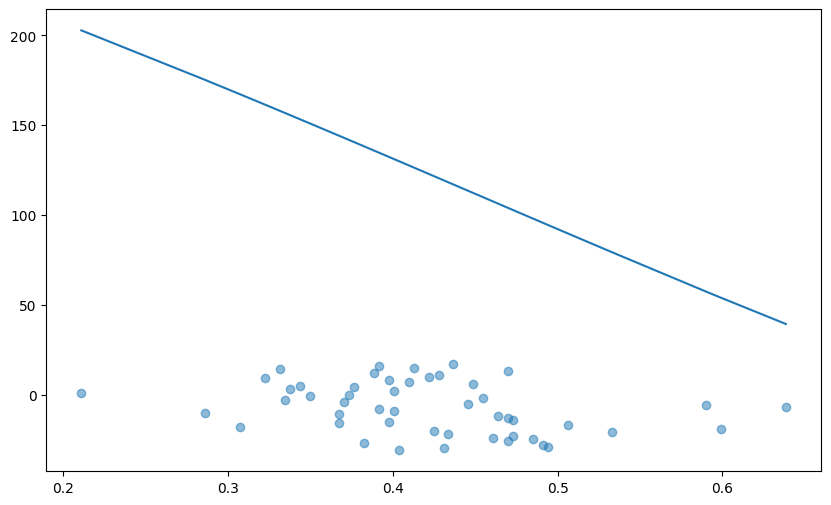

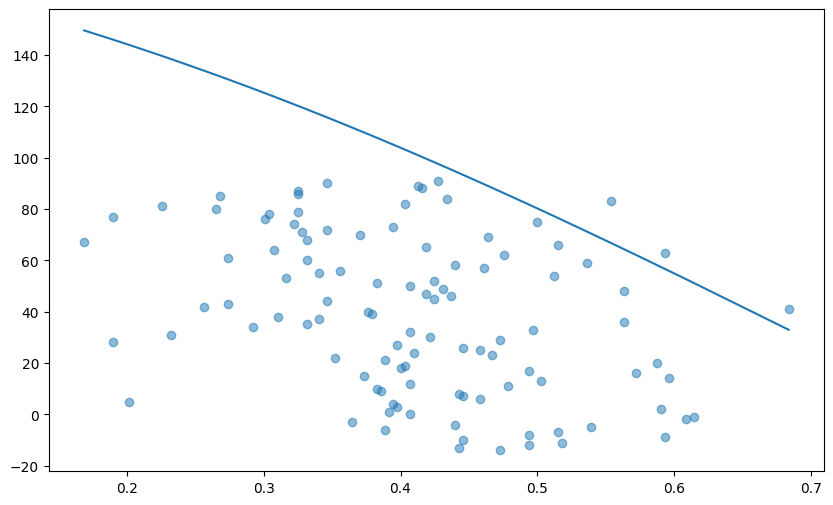

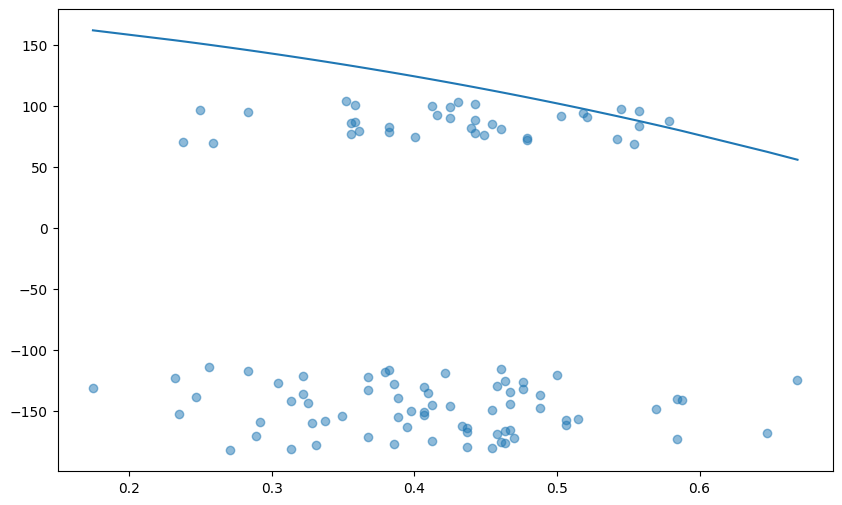

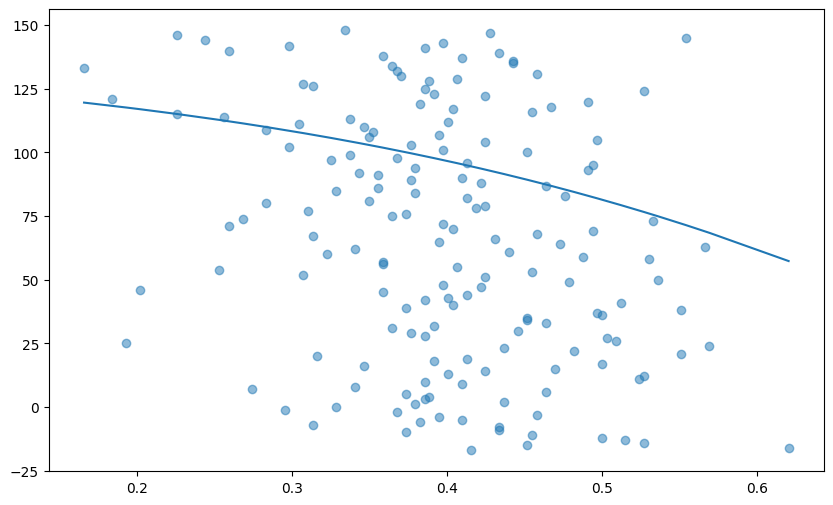

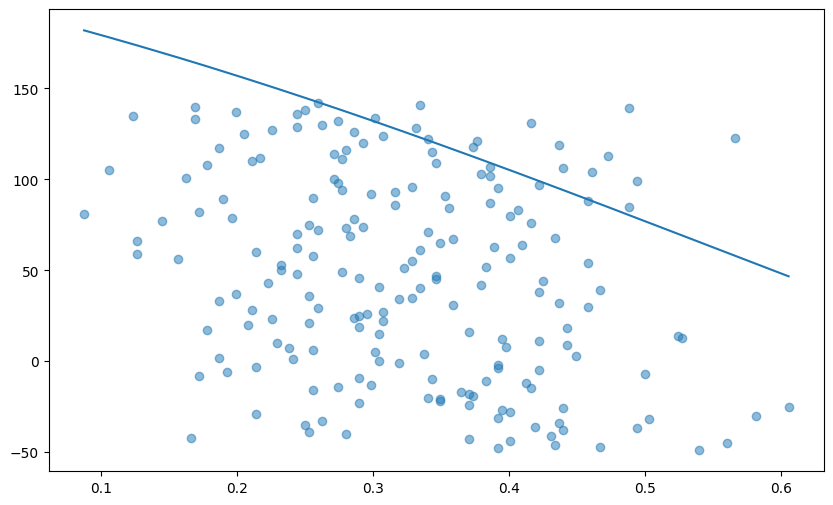

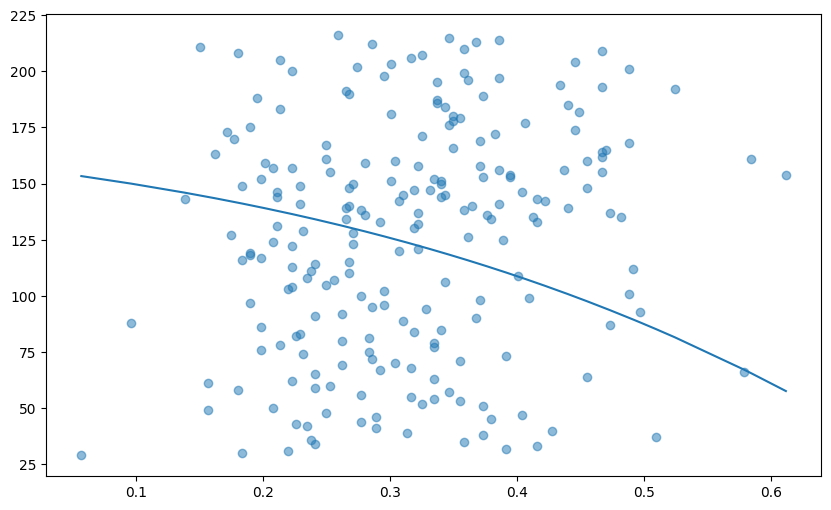

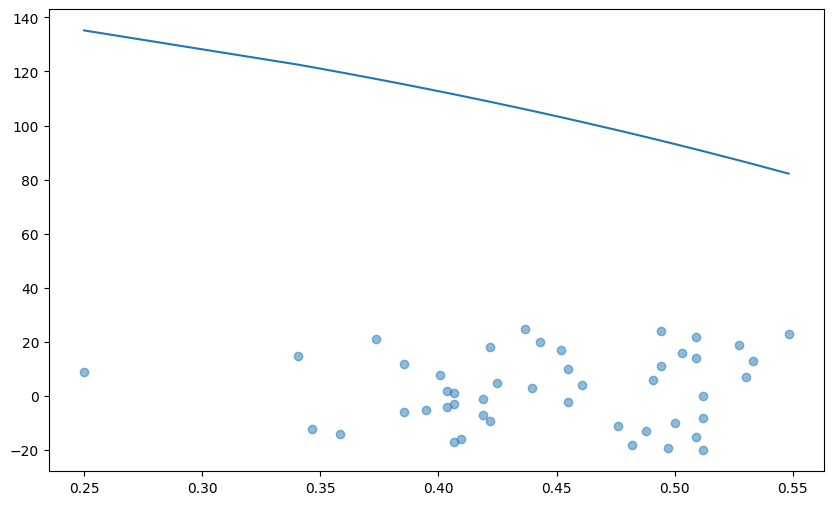

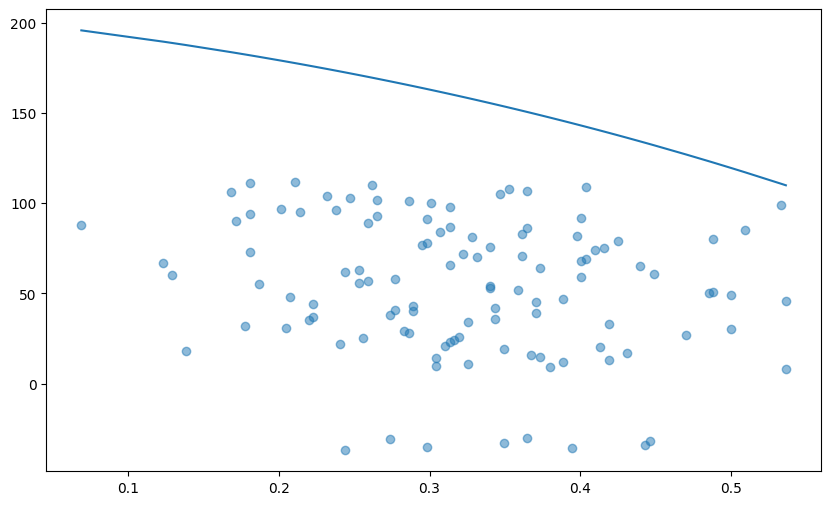

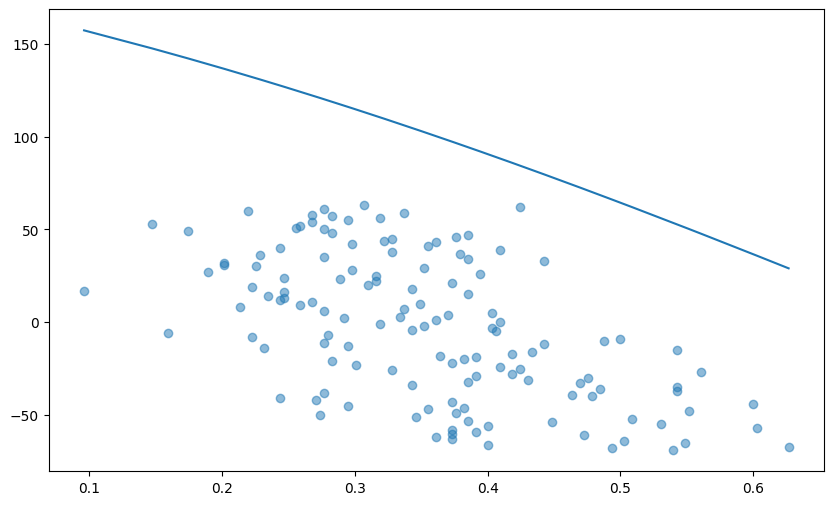

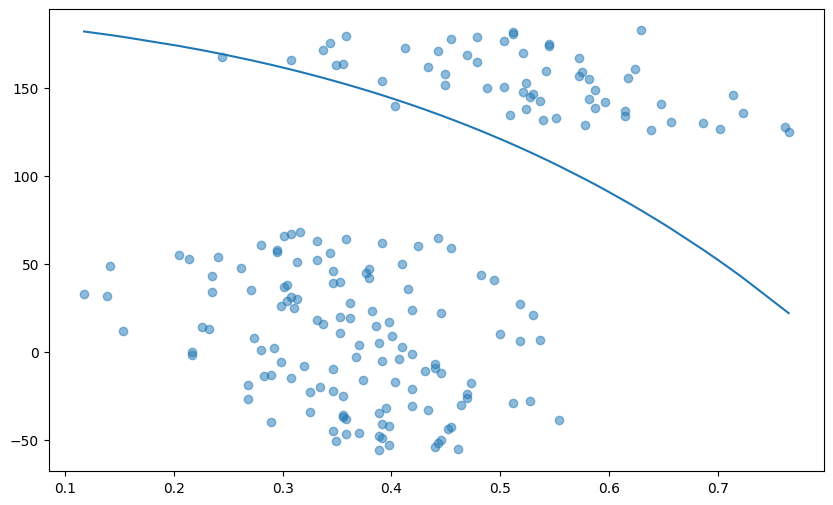

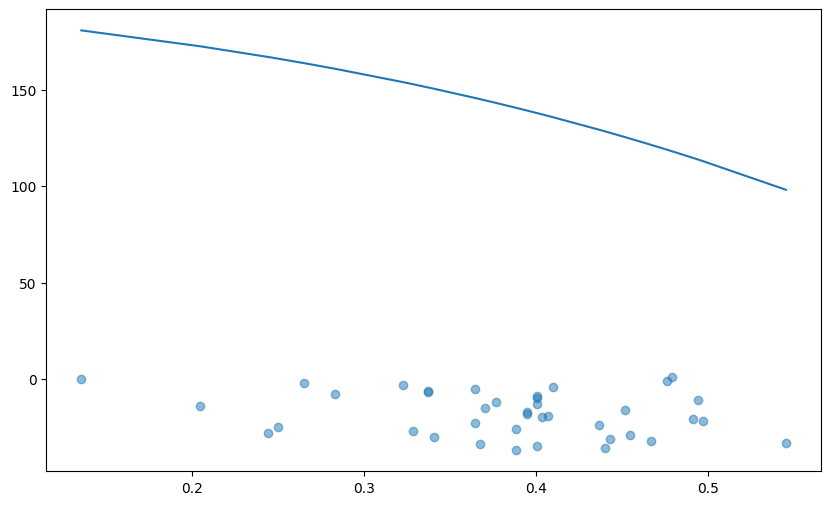

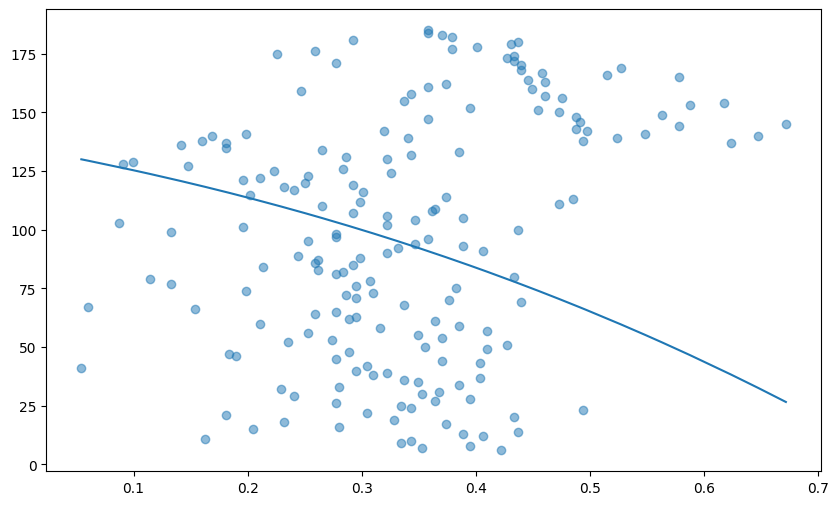

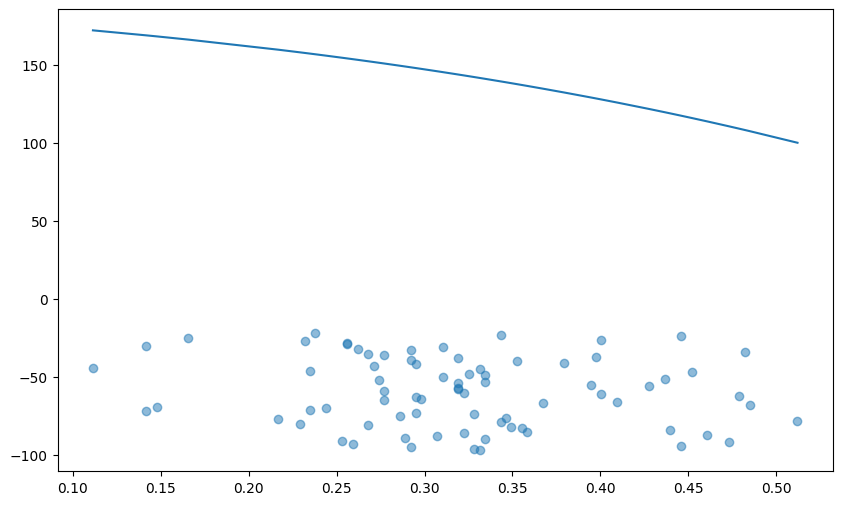

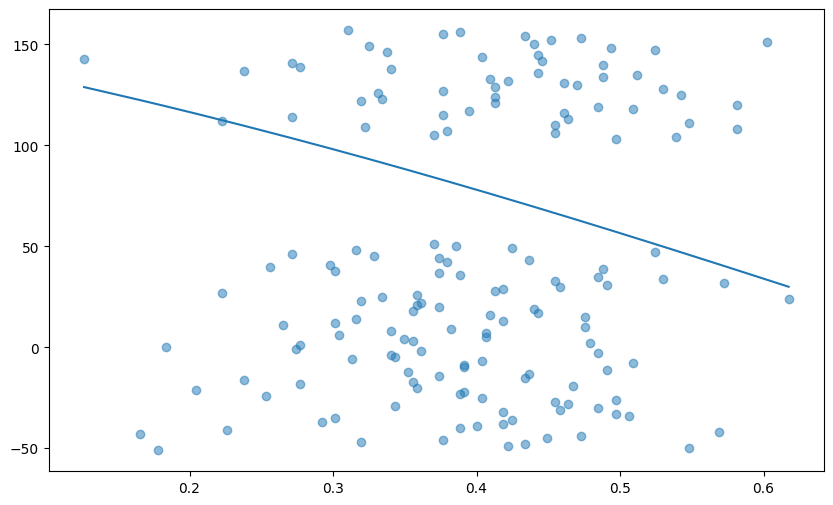

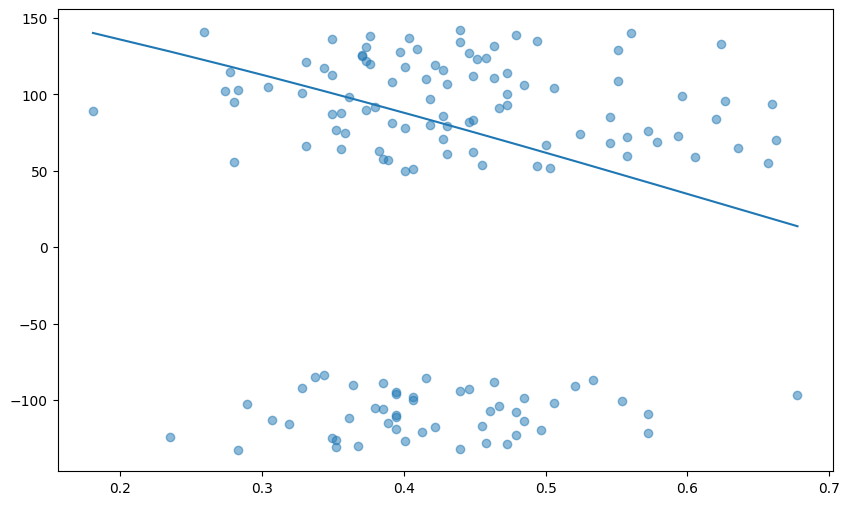

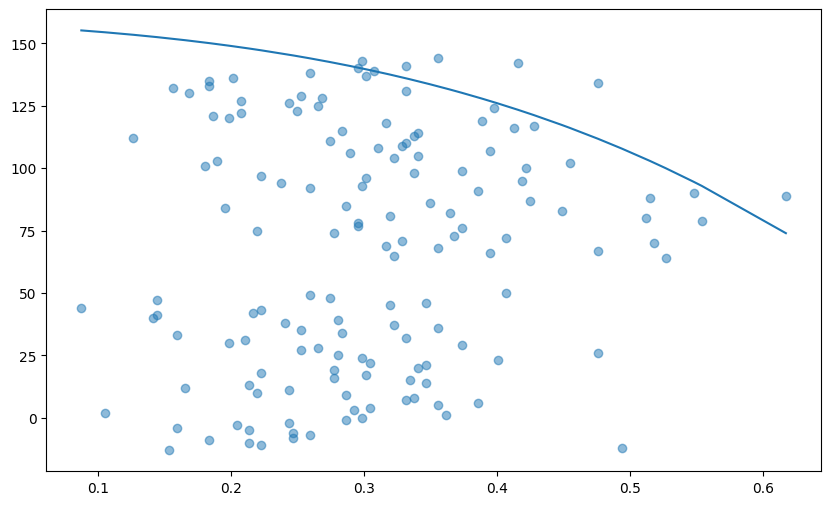

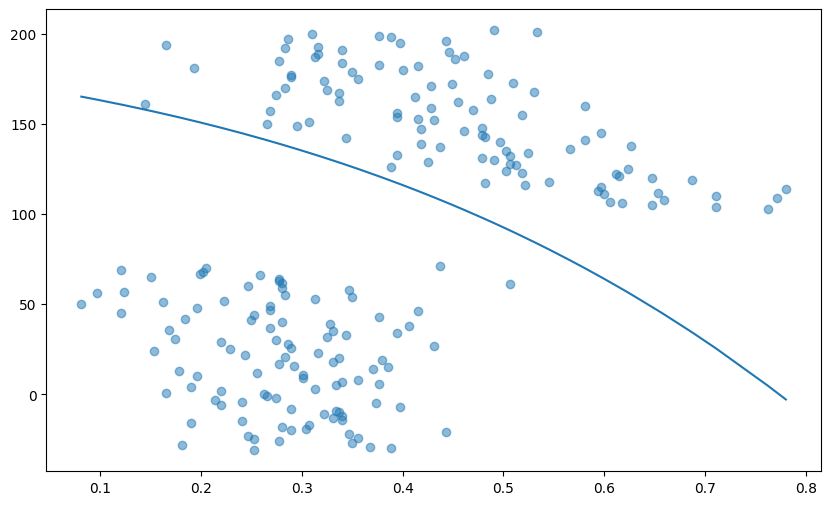

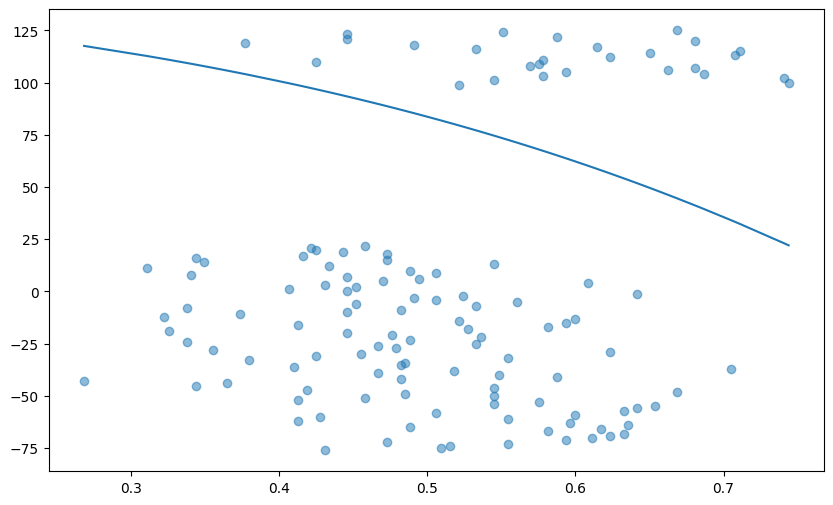

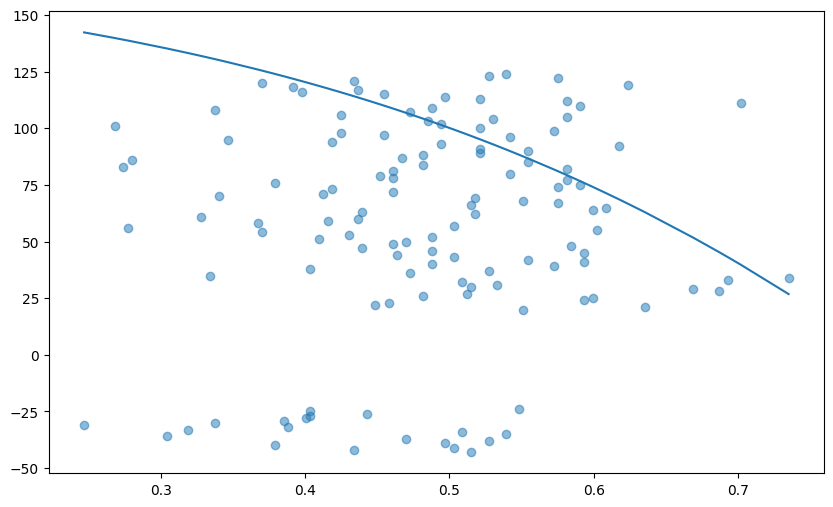

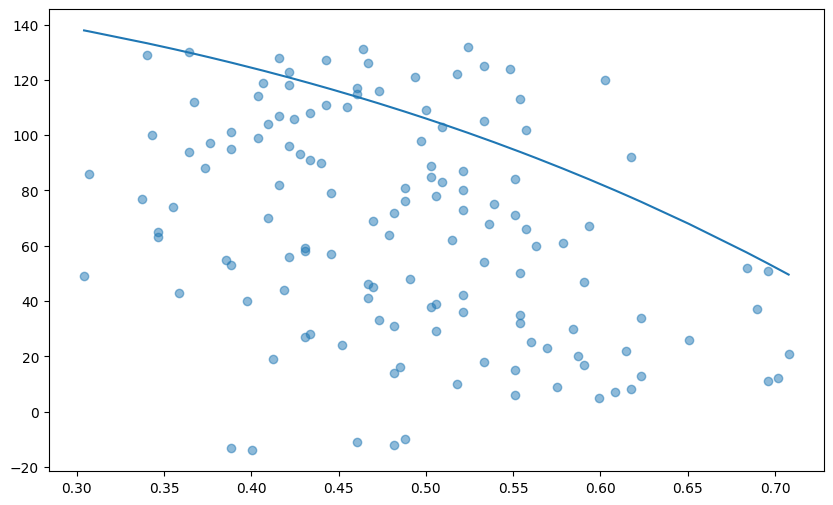

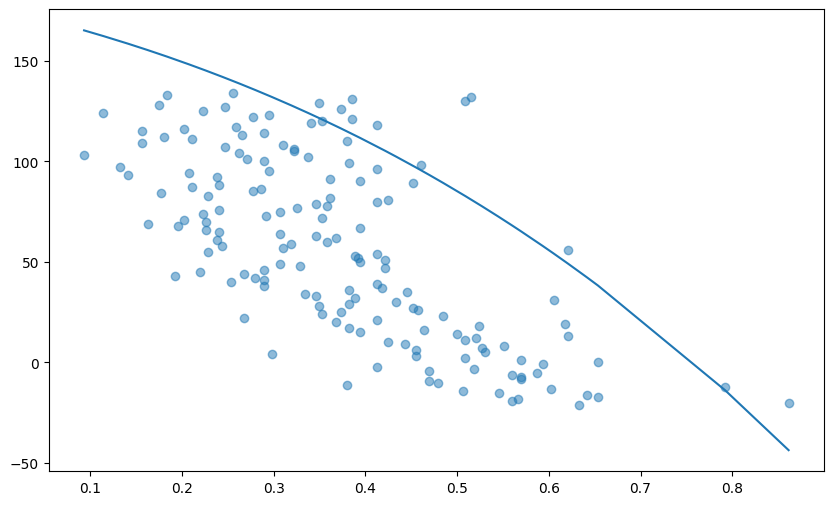

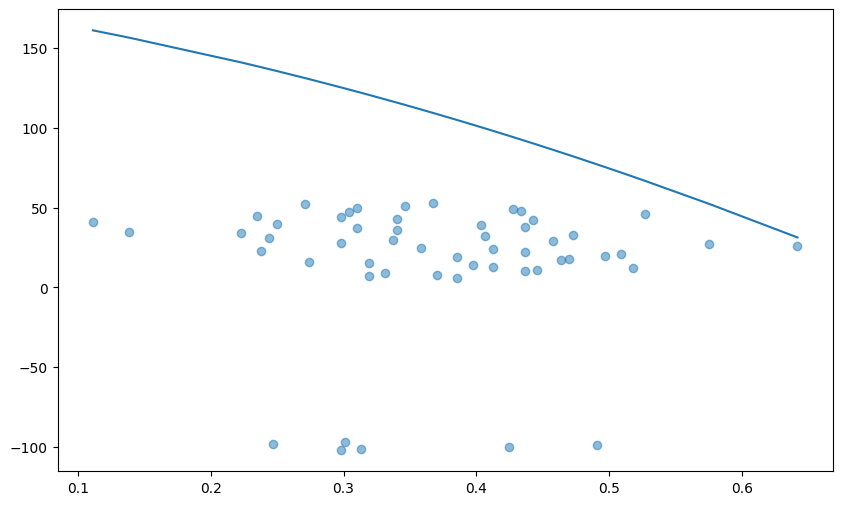

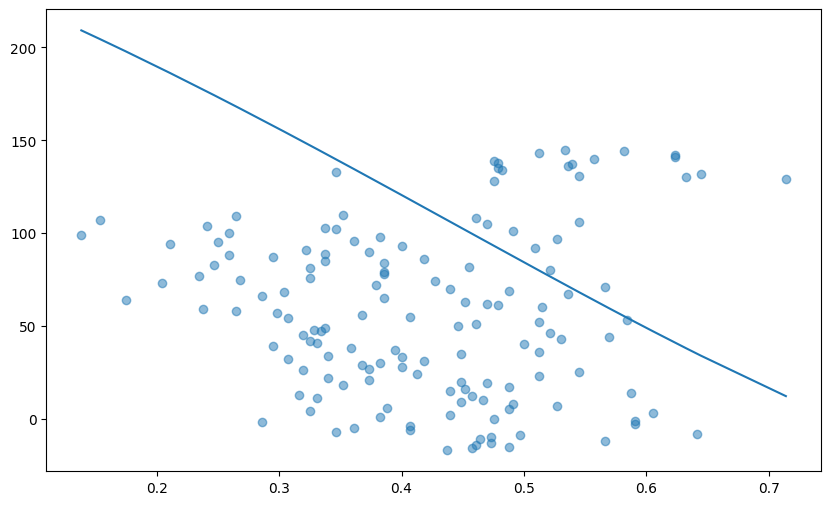

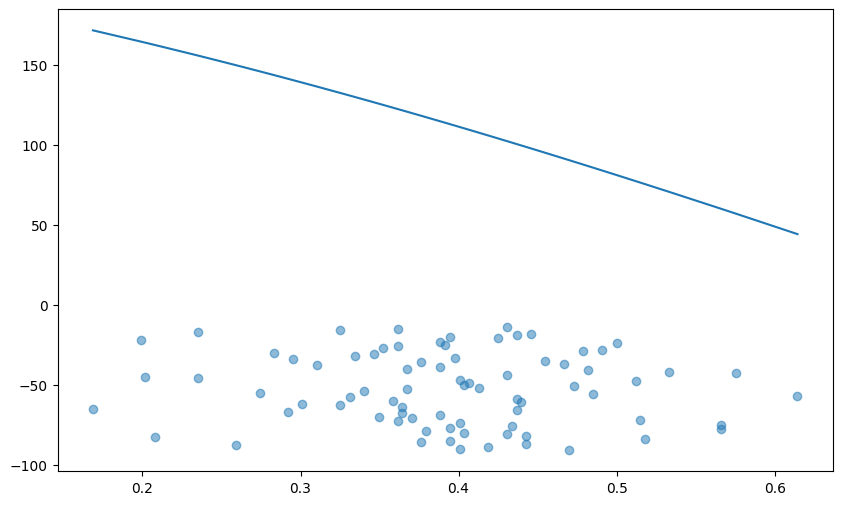

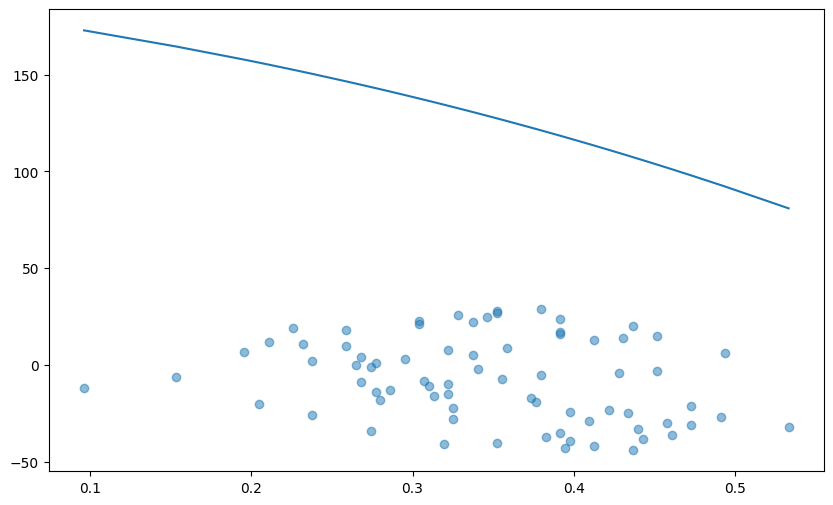

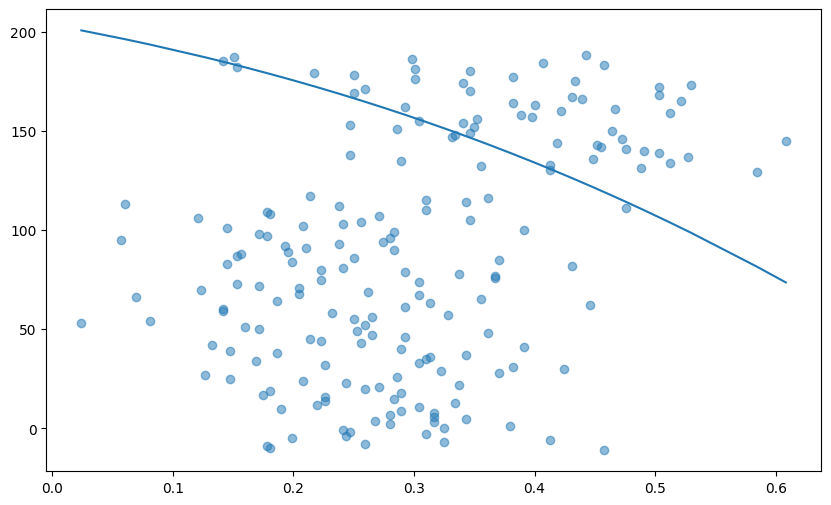

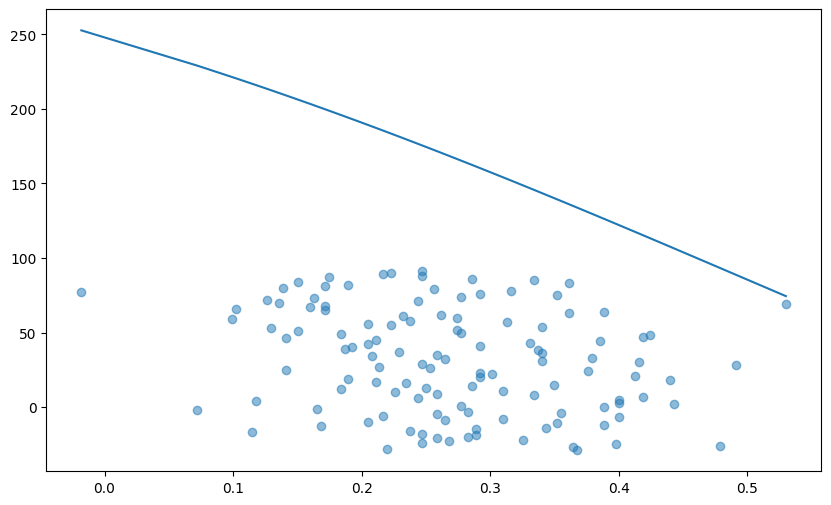

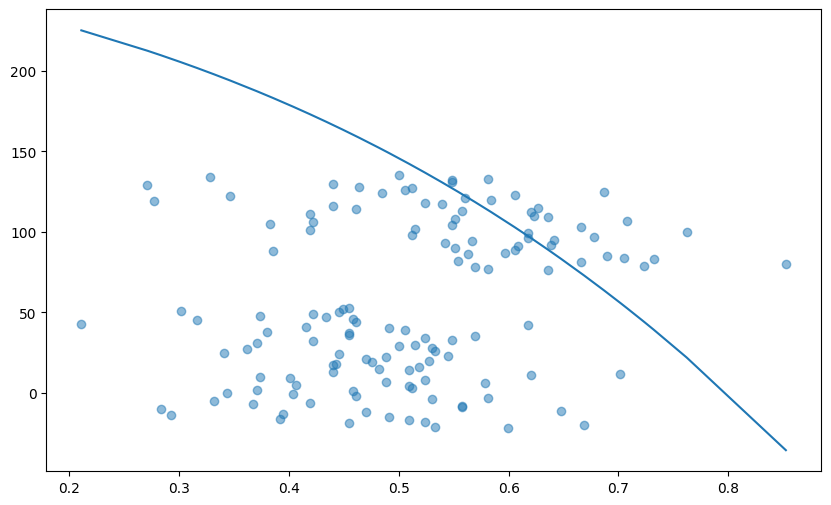

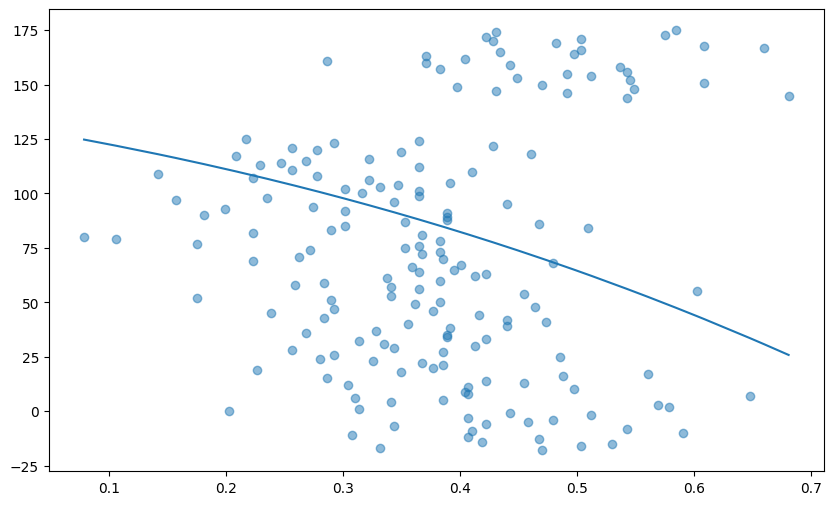

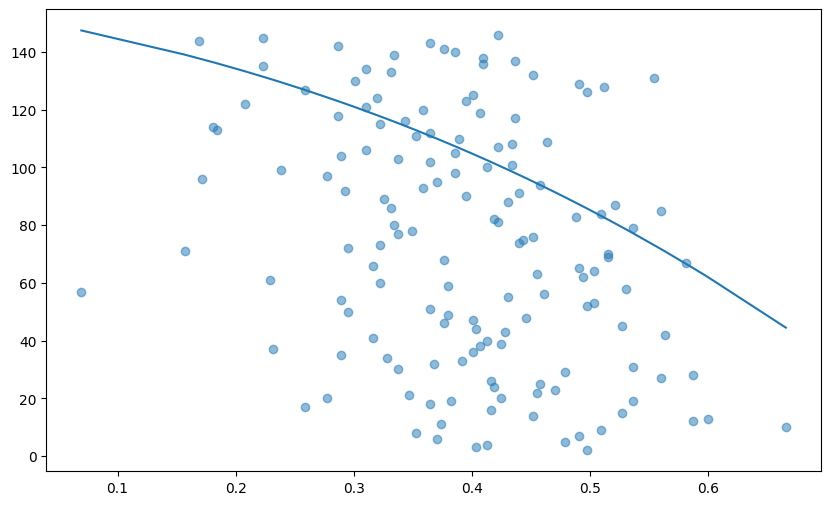

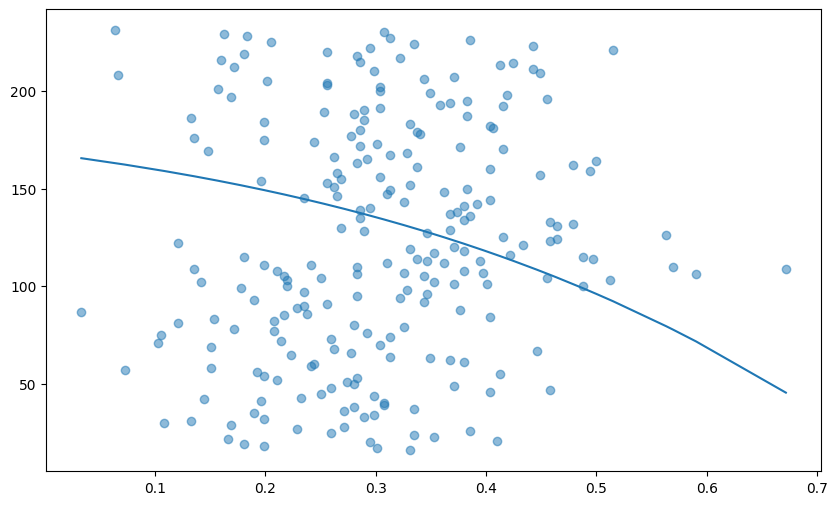

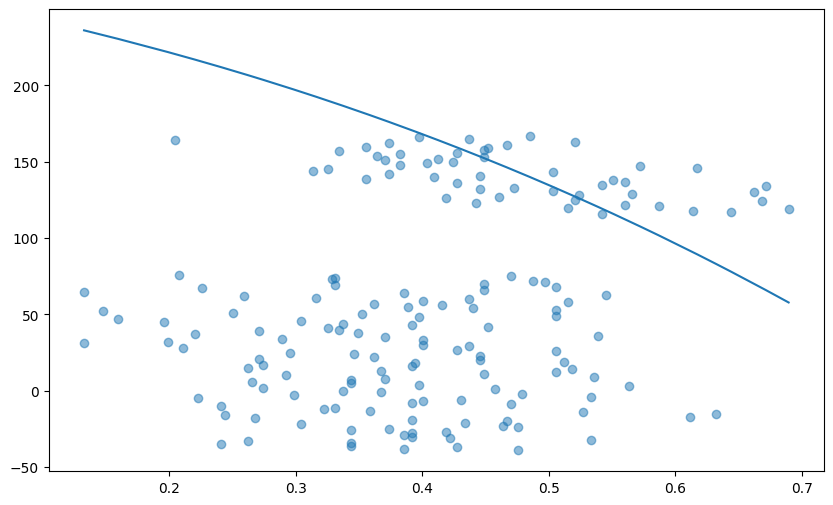

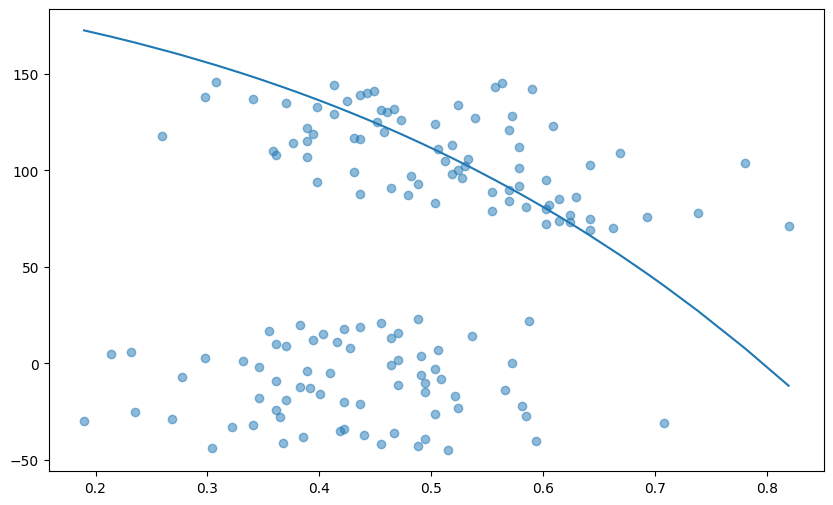

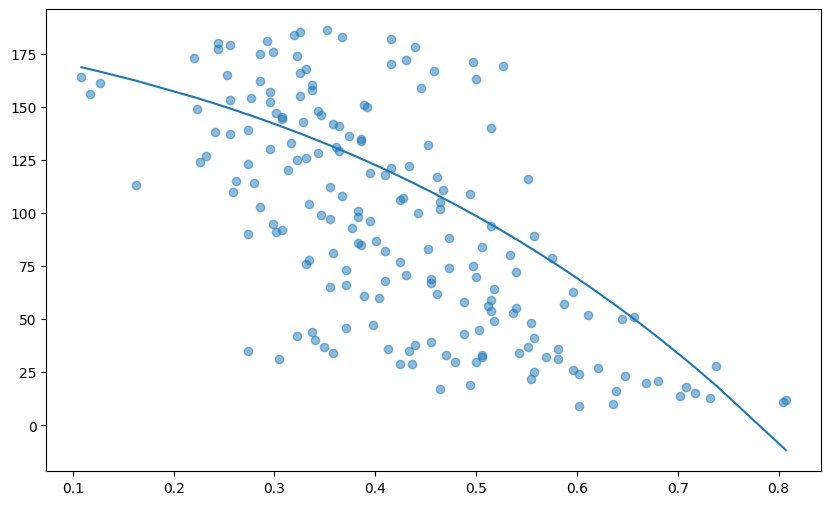

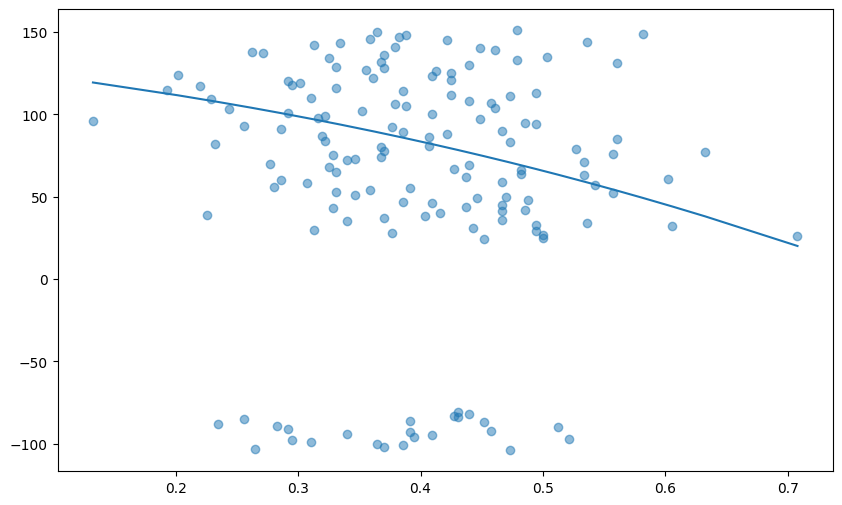

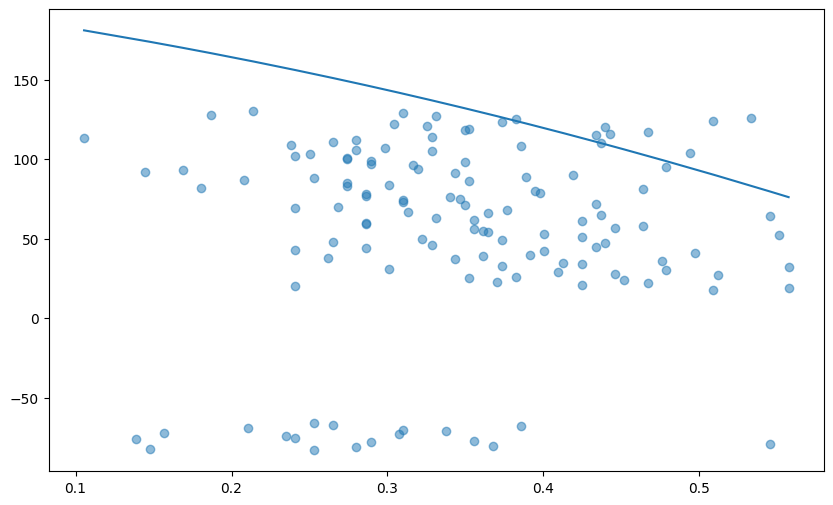

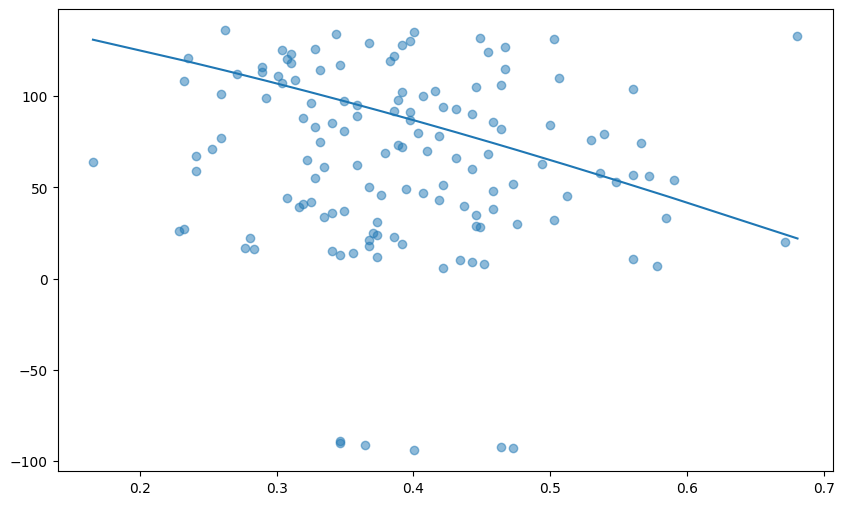

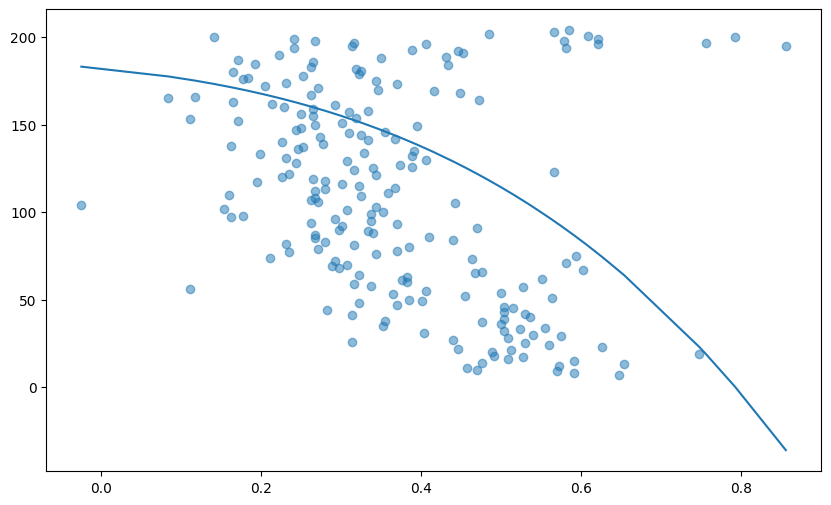

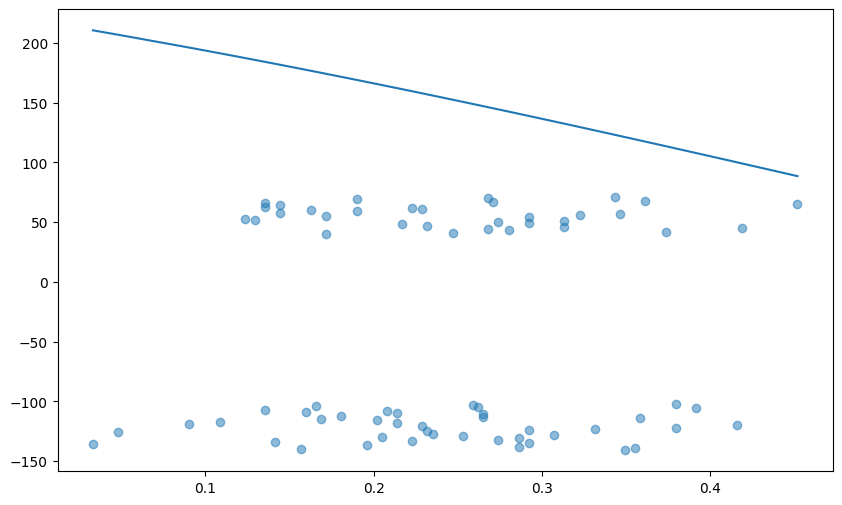

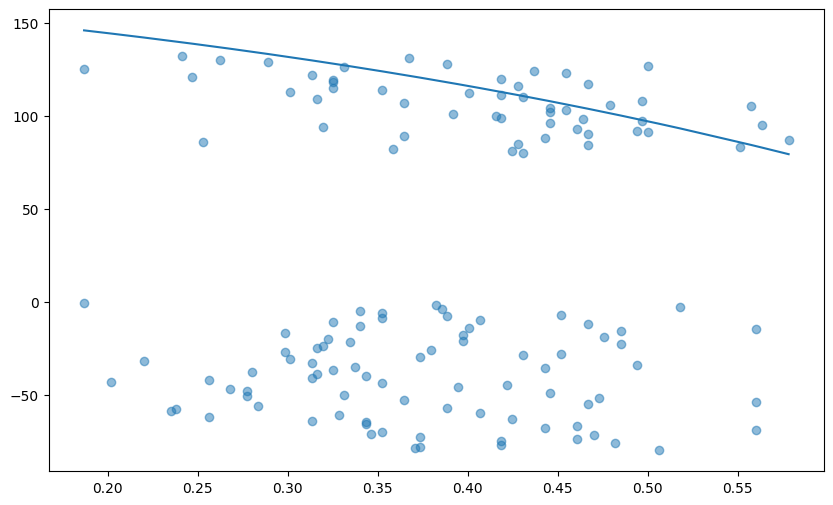

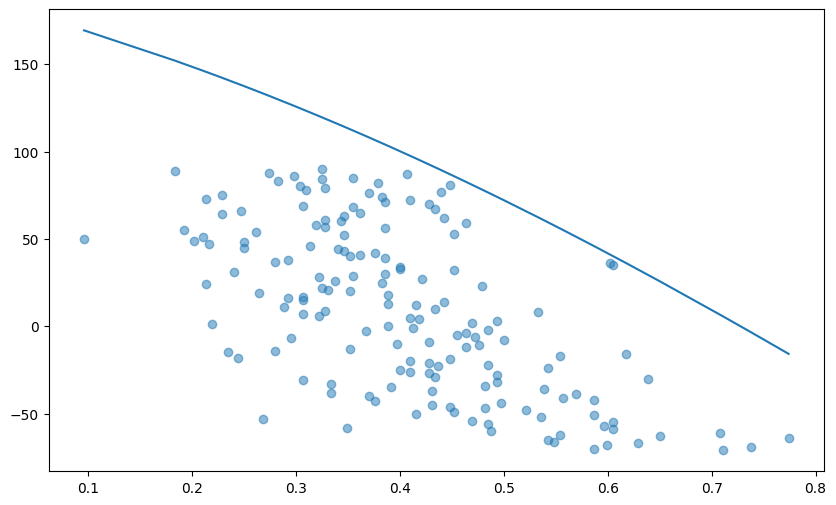

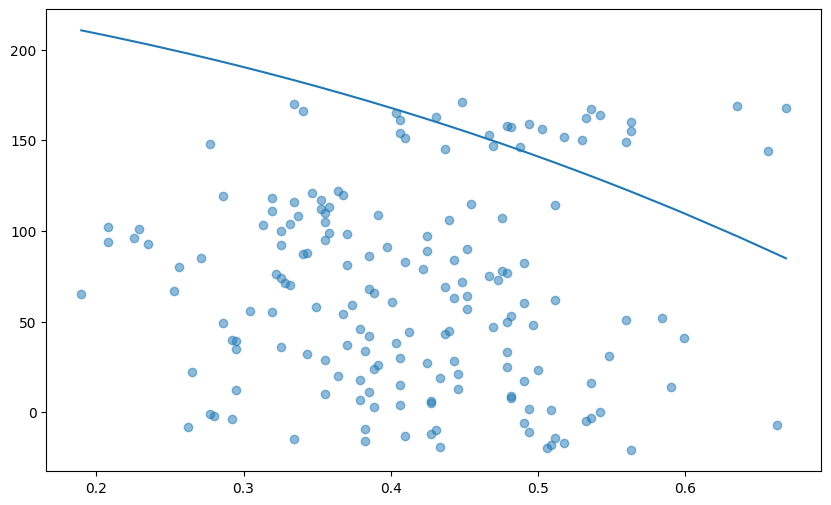

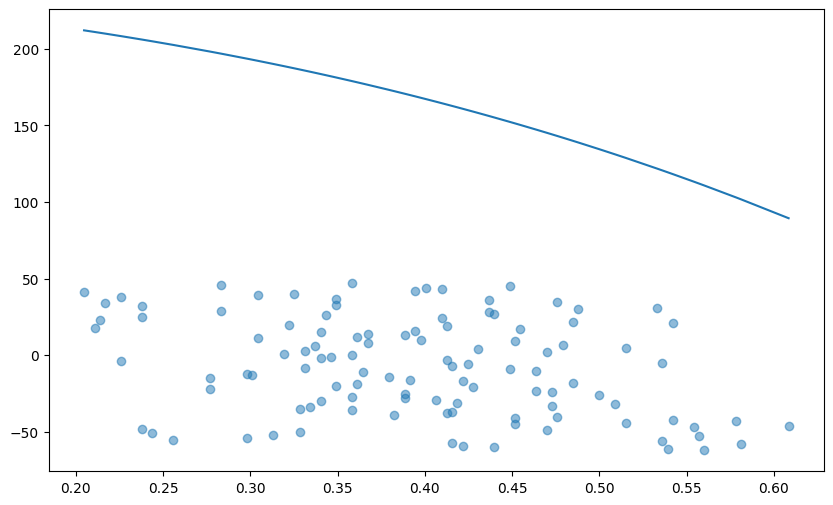

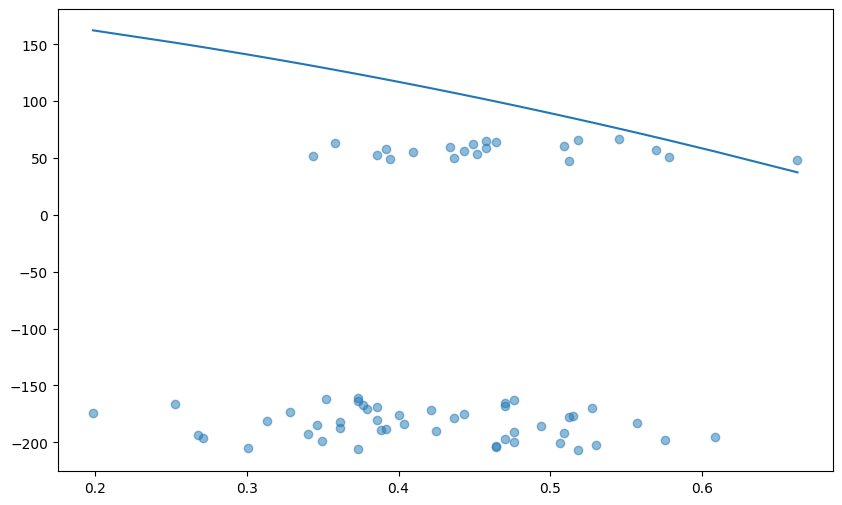

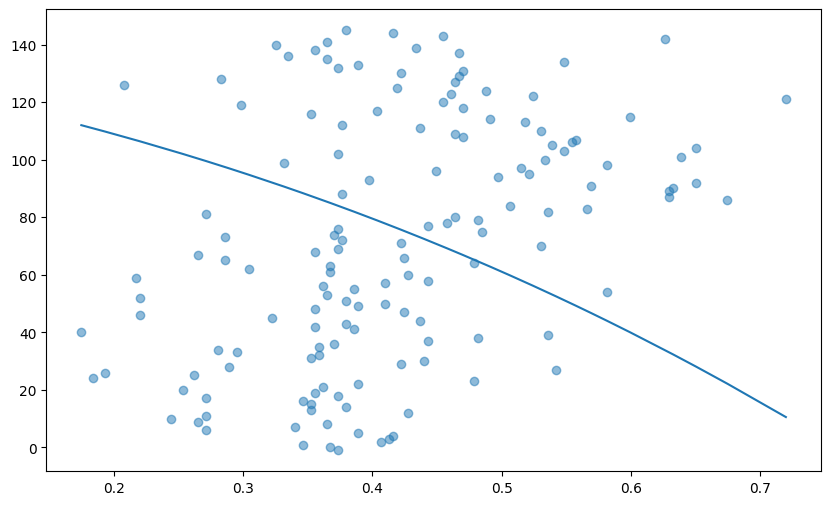

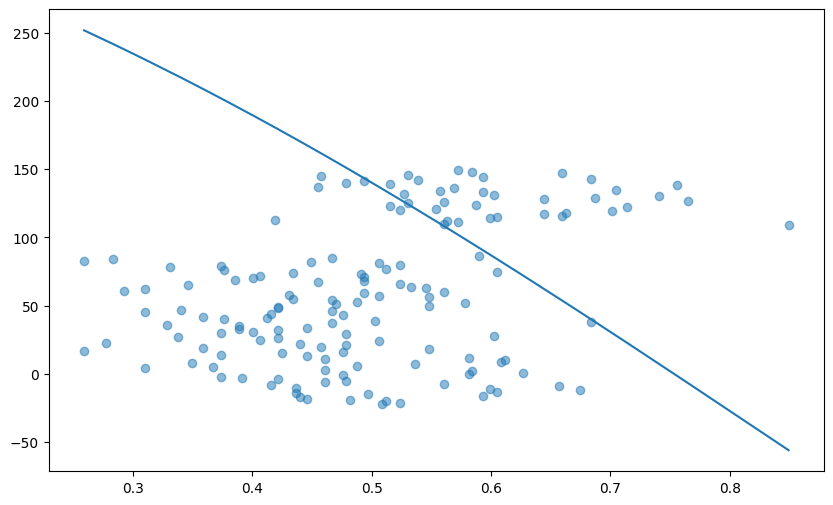

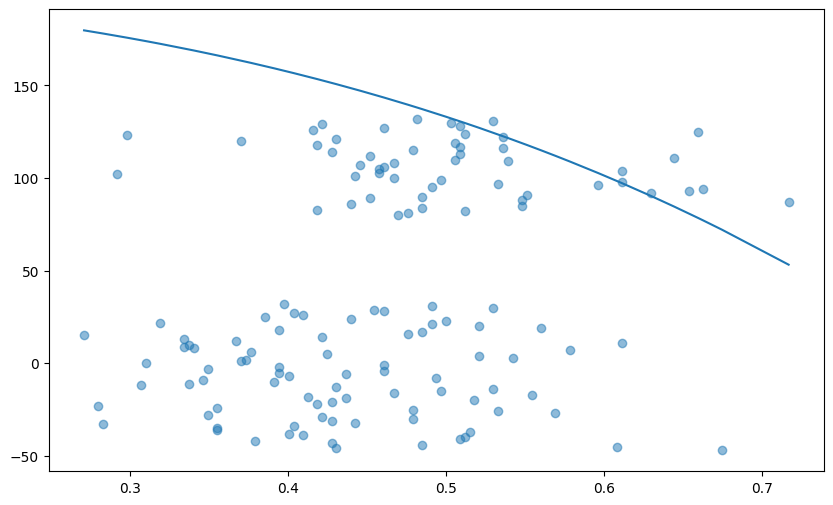

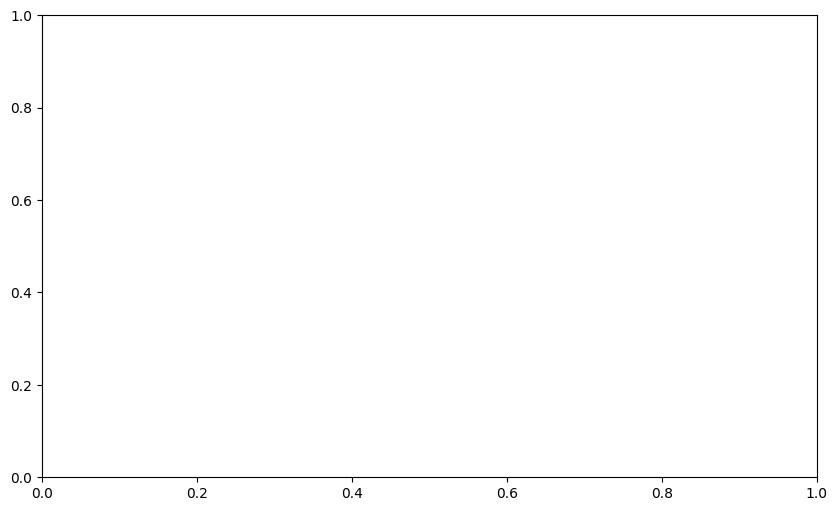

In [99]:
import numpy as np
import matplotlib.pyplot as plt

class BayesianLinearRegression:
    def __init__(self, alpha=1.0, beta=1.0):
        self.alpha = alpha  # Prior precision
        self.beta = beta    # Noise precision
        self.m_N = None     # Posterior mean
        self.S_N = None     # Posterior covariance

    def fit(self, X, y):
        N, D = X.shape
        I = np.eye(D)
        self.S_N = np.linalg.inv(self.alpha * I + self.beta * X.T @ X)
        self.m_N = self.beta * self.S_N @ X.T @ y

    def predict(self, X_test):
        mean = X_test @ self.m_N
        variance = (1 / self.beta) + np.sum(X_test @ self.S_N * X_test, axis=1)
        return mean, variance

# Example usage: Assuming df_train and df_test are your DataFrames


# Instantiate the Bayesian Regression model
blr = BayesianLinearRegression()

# Fit Bayesian Regression for each engine (or repeat)
for engine_id in df_train_copy['id'].unique():
    if engine_id % 2 == 0:  # Plot every other engine
        # Training data
        df_engine_train = df_train_copy[df_train_copy['id'] == engine_id]
        X_train = df_engine_train[['s_2']].values
        y_train = df_engine_train['RUL'].values
        
        # Create polynomial features (degree 4)
        X_poly_train = np.vstack([X_train.flatten()**i for i in range(5)]).T
        
        # Test data
        df_engine_test = df_test_copy[df_test_copy['id'] == engine_id]
        X_test = df_engine_test[['s_2']].values
        y_test = df_engine_test['RUL'].values
        
        # If no test data, skip this engine
        if len(X_test) == 0:
            continue
            
        # Create polynomial features for test
        X_poly_test = np.vstack([X_test.flatten()**i for i in range(5)]).T
        
        # Set hyperparameters
        alpha = 100
        beta = 1 / (0.05 ** 2)  
        
        # Fit and predict
        blr = BayesianLinearRegression(alpha=alpha, beta=beta)
        blr.fit(X_poly_train, y_train)
        mean_pred, var_pred = blr.predict(X_poly_test)
        std_pred = np.sqrt(var_pred)
        
        # Sort for plotting
        sort_idx = np.argsort(X_test.flatten())
        X_sorted = X_test[sort_idx]
        mean_sorted = mean_pred[sort_idx]
        std_sorted = std_pred[sort_idx]
        y_sorted = y_test[sort_idx]
        
        # Plot
        plt.figure(figsize=(10, 6))

        plt.scatter(X_test, y_test, alpha=0.5, label=f'Engine {engine_id} Actual')
        plt.plot(X_sorted, mean_sorted, label=f'Engine {engine_id} Prediction')
        plt.fill_between(X_sorted.flatten(), 
                        mean_sorted - std_sorted, 
                        mean_sorted + std_sorted, 
                        alpha=0.2)

plt.xlabel('Sensor s_2 value')
plt.ylabel('RUL')
plt.title('Bayesian Regression: Test Set Predictions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [37]:
import random
x = [1,6,5,4,2]
index =random.choice(x)
random_index_rand = random.randrange(len(x))
print(random_index_rand)
print(x[random_index_rand])

2
5


In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import random

class BayesianLinearRegression:
    def __init__(self, alpha=1.0, beta=1.0):
        self.alpha = alpha  # Prior precision
        self.beta = beta    # Noise precision
        self.m_N = None     # Posterior mean
        self.S_N = None     # Posterior covariance

    def fit(self, X, y):
        N, D = X.shape
        I = np.eye(D)
        self.S_N = np.linalg.inv(self.alpha * I + self.beta * X.T @ X)
        self.m_N = self.beta * self.S_N @ X.T @ y

    def predict(self, X_test):
        mean = X_test @ self.m_N
        variance = (1 / self.beta) + np.sum(X_test @ self.S_N * X_test, axis=1)
        return mean, np.sqrt(variance)

# Scale features


id    cycles  setting_1  setting_2  setting_3  s_1       s_2       s_3  \
0  0.0  0.016620   0.557471   0.583333        0.0  0.0  0.382530  0.463920   
1  0.0  0.019391   0.304598   0.750000        0.0  0.0  0.406627  0.259865   
2  0.0  0.022161   0.545977   0.583333        0.0  0.0  0.274096  0.434707   
3  0.0  0.024931   0.310345   0.583333        0.0  0.0  0.150602  0.440375   
4  0.0  0.027701   0.603448   0.250000        0.0  0.0  0.322289  0.233486   

        s_4  s_5  ...      s_13      s_14      s_15  s_16      s_17  s_18  \
0  0.261985  0.0  ...  0.220588  0.167097  0.278953   0.0  0.333333   0.0   
1  0.316003  0.0  ...  0.220588  0.160646  0.318199   0.0  0.250000   0.0   
2  0.211850  0.0  ...  0.250000  0.132883  0.184302   0.0  0.333333   0.0   
3  0.307394  0.0  ...  0.264706  0.151925  0.399000   0.0  0.416667   0.0   
4  0.310432  0.0  ...  0.191176  0.209722  0.419777   0.0  0.333333   0.0   

   s_19      s_20      s_21       RUL  
0   0.0  0.744186  0.667219  0.512465  
1   0.0  0.643411  0.574979  0.509695  
2   0.0  0.705426  0.707539  0.506925  
3   0.0  0.627907  0.794256  0.504155  
4   0.0  0.620155  0.807097  0.501385  

[5 rows x 27 columns]

C:\Users\venablecrofta\AppData\Local\Temp\ipykernel_964\1545414155.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 8))


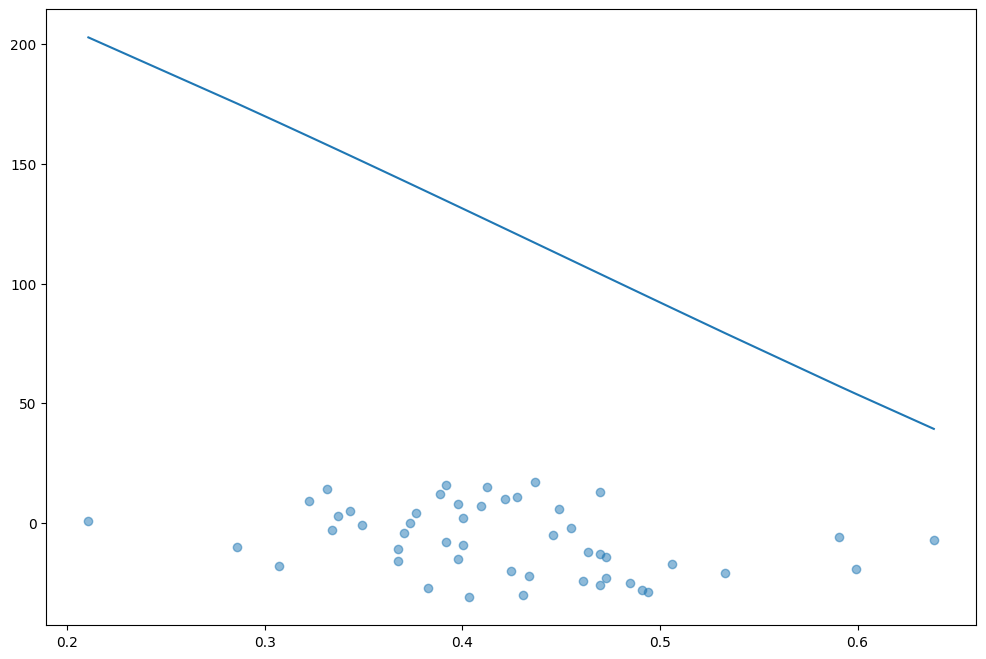

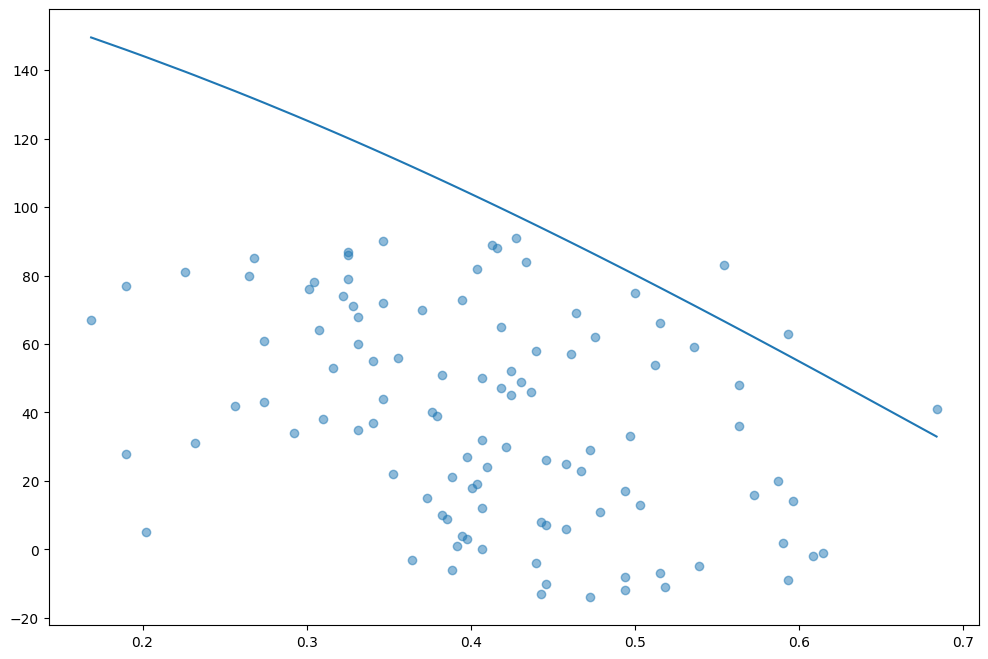

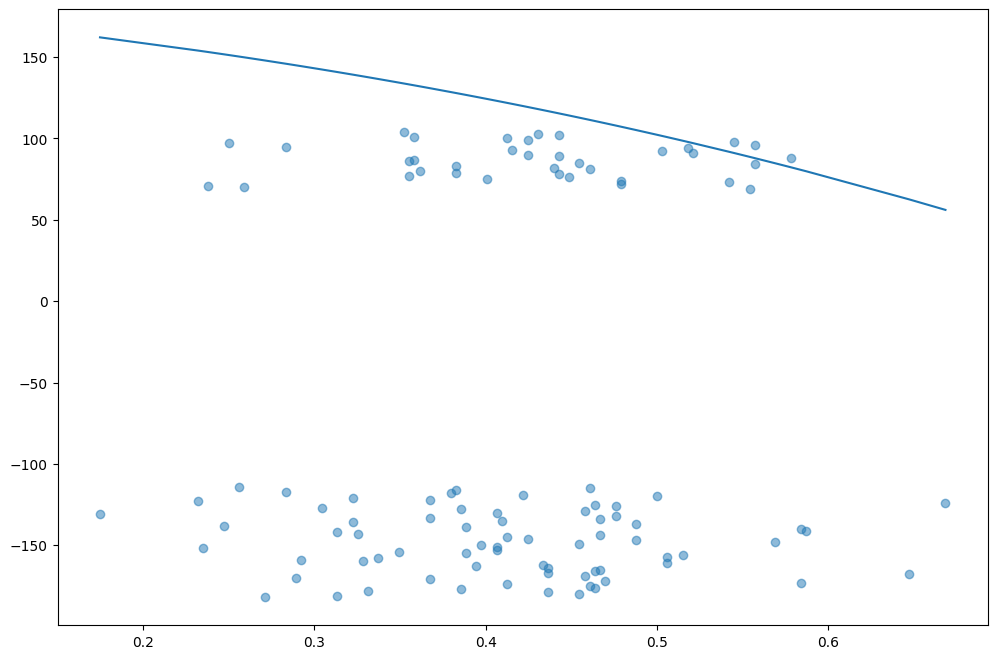

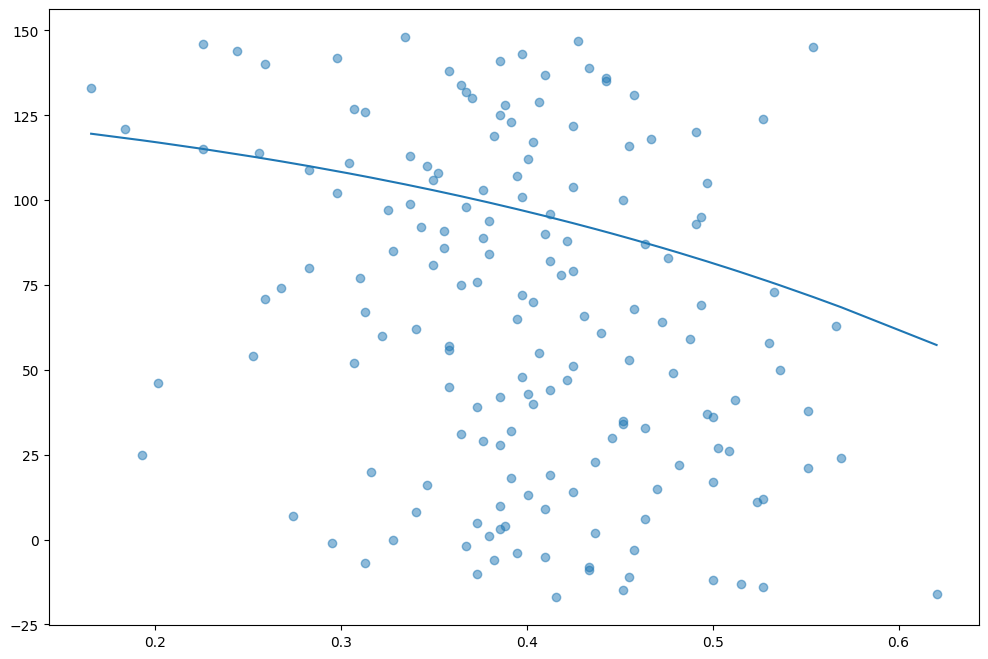

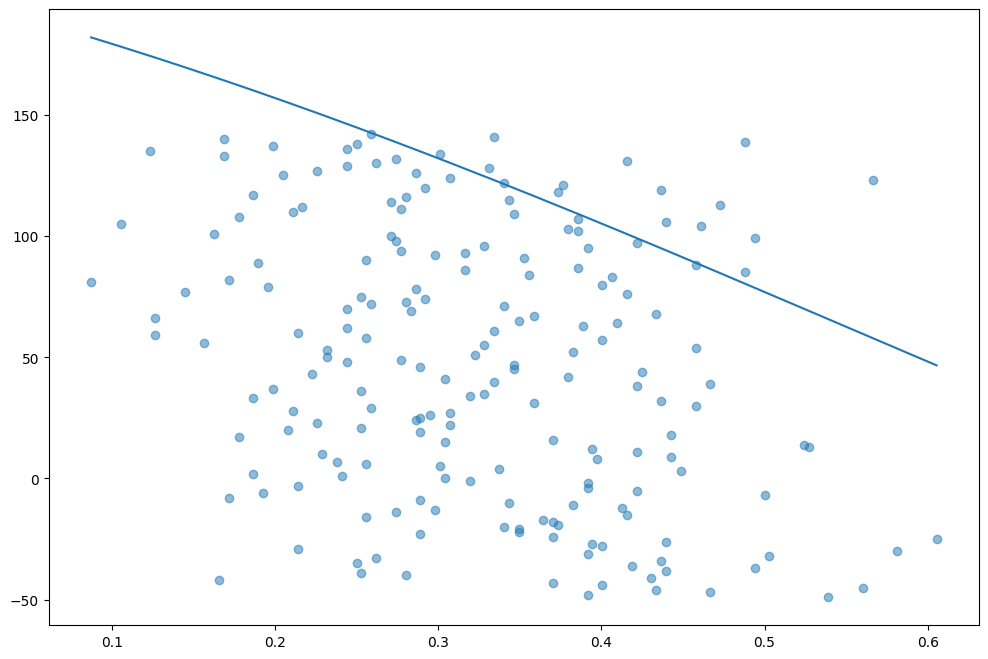

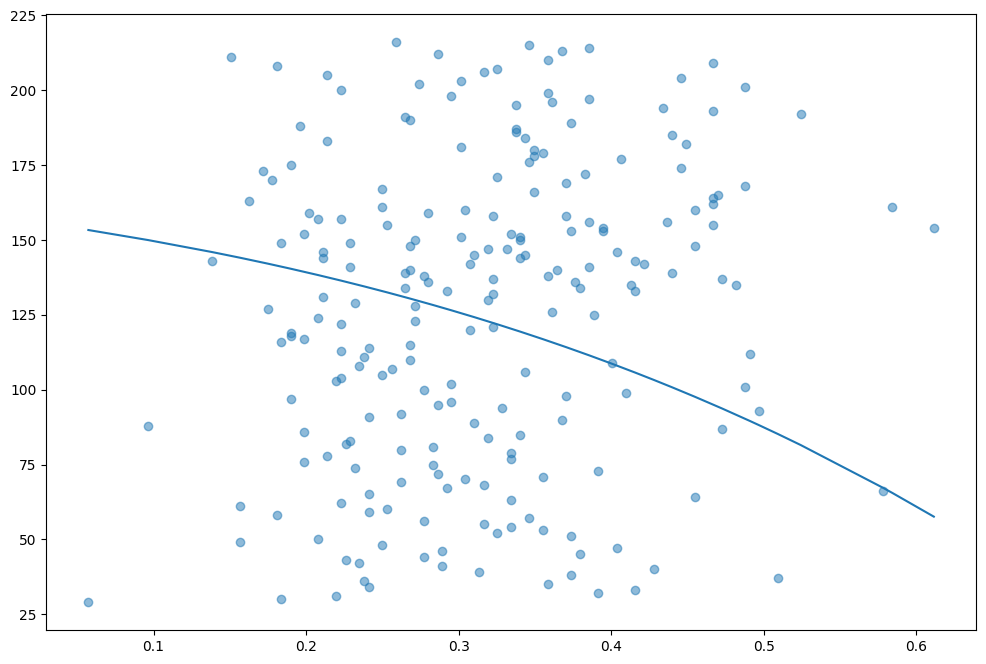

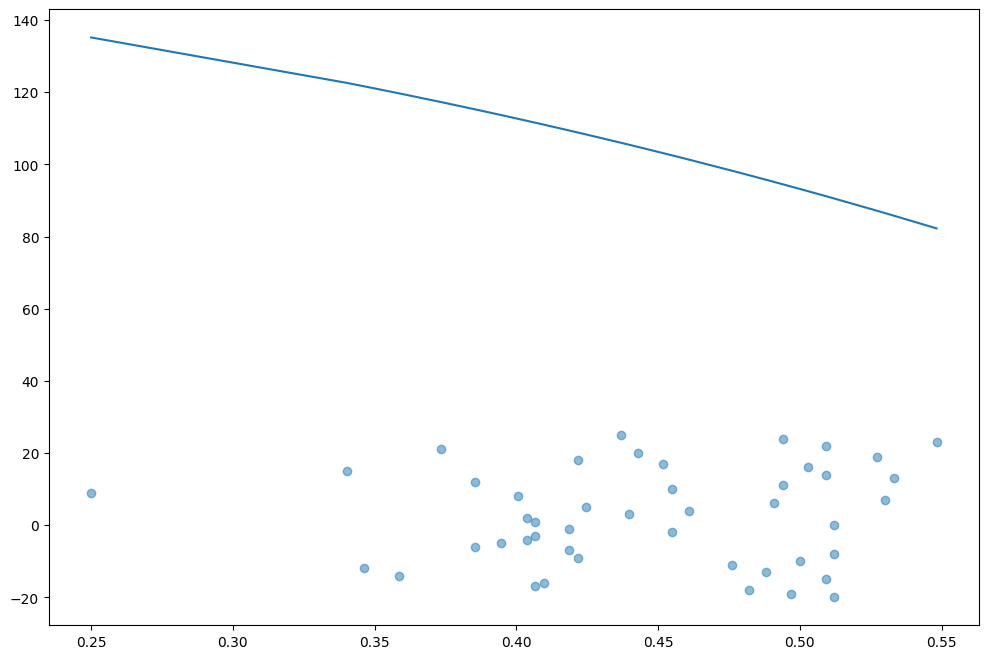

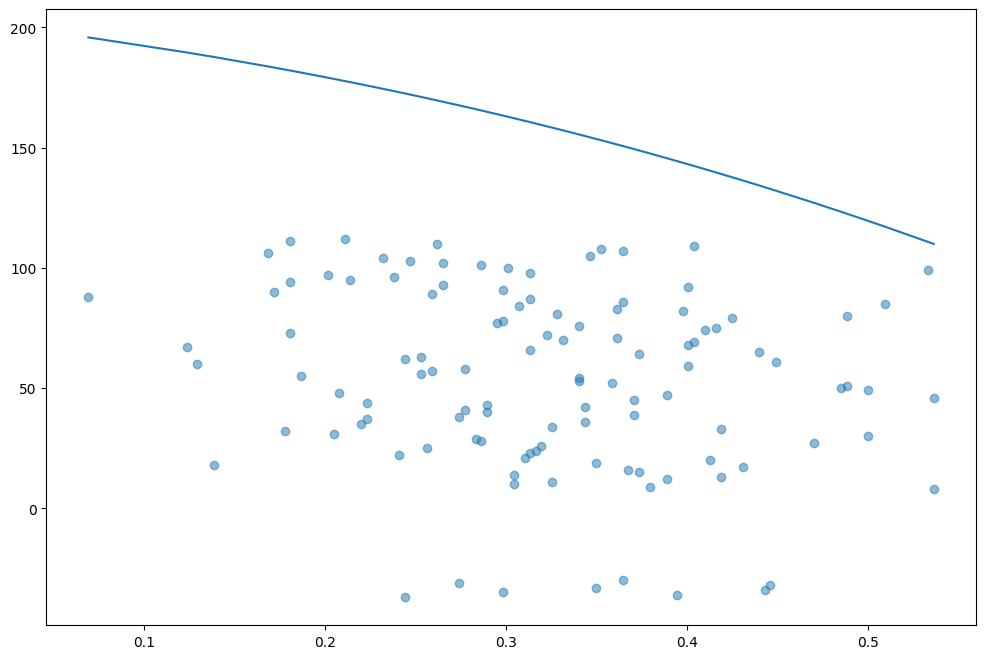

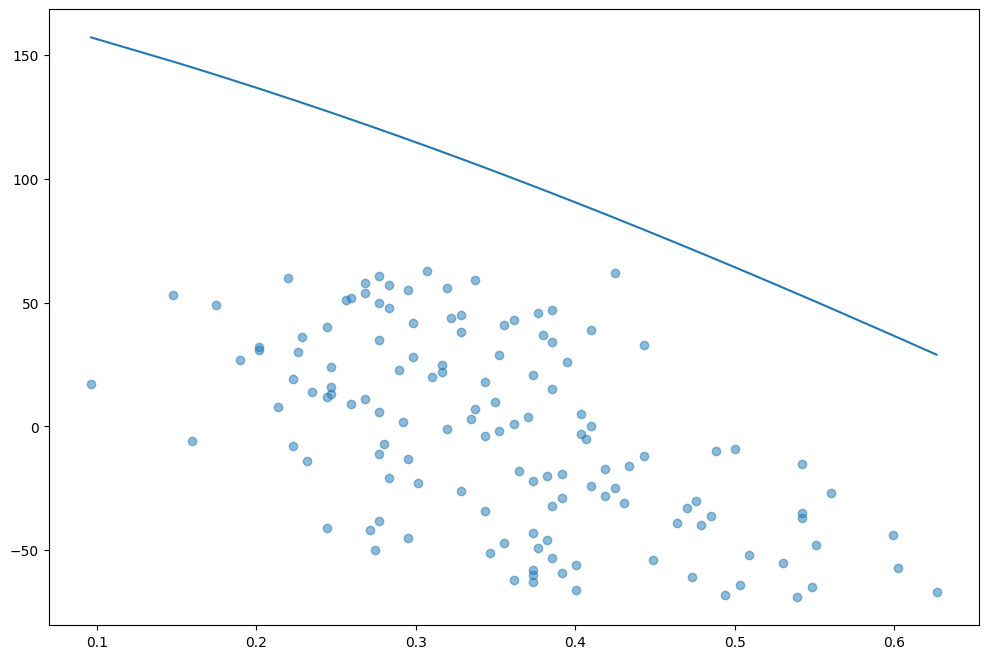

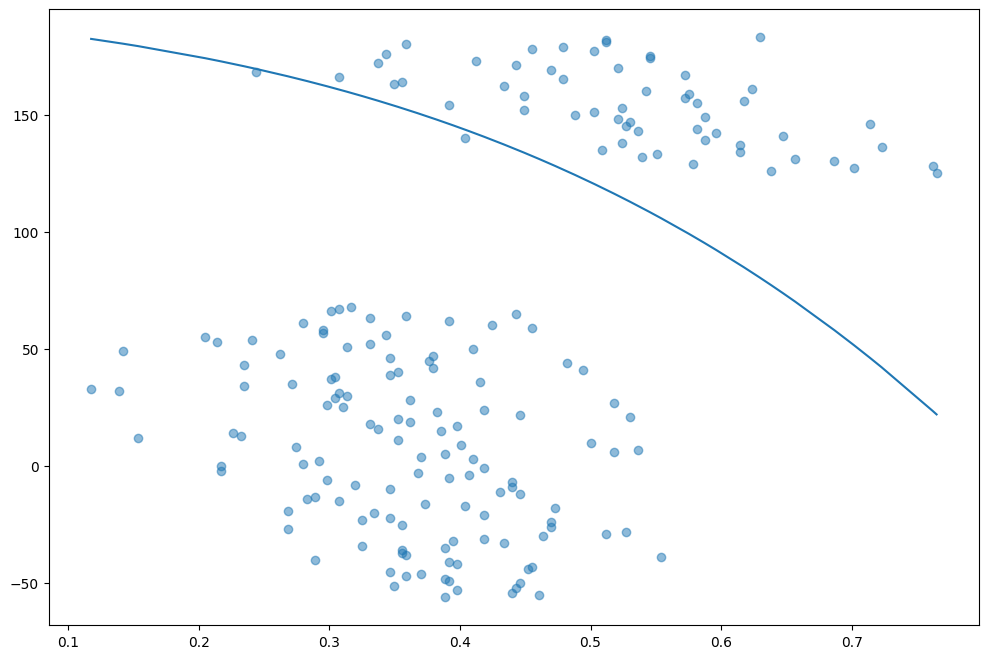

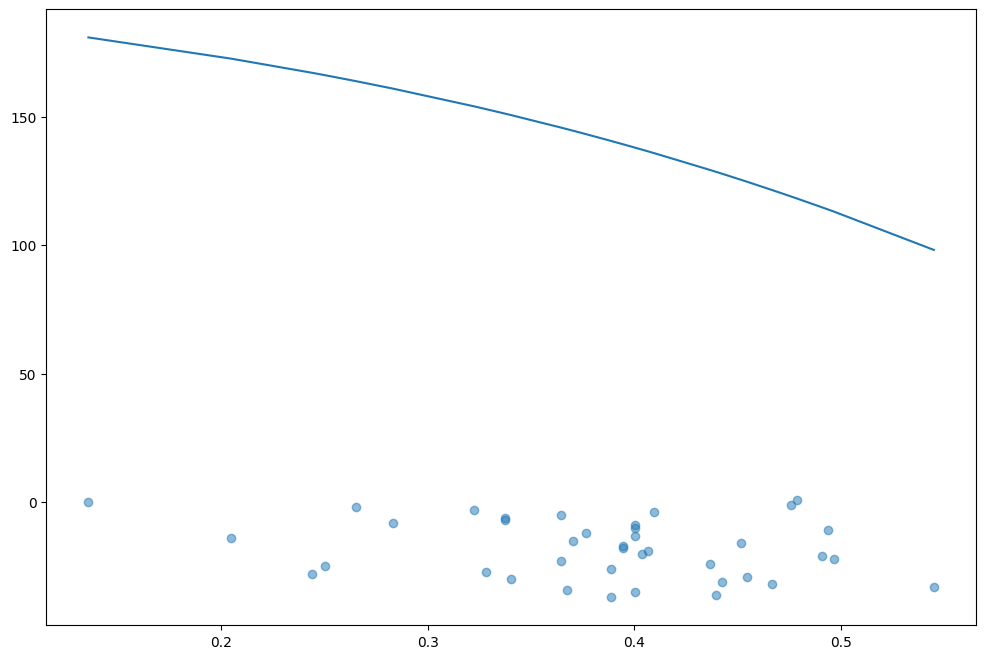

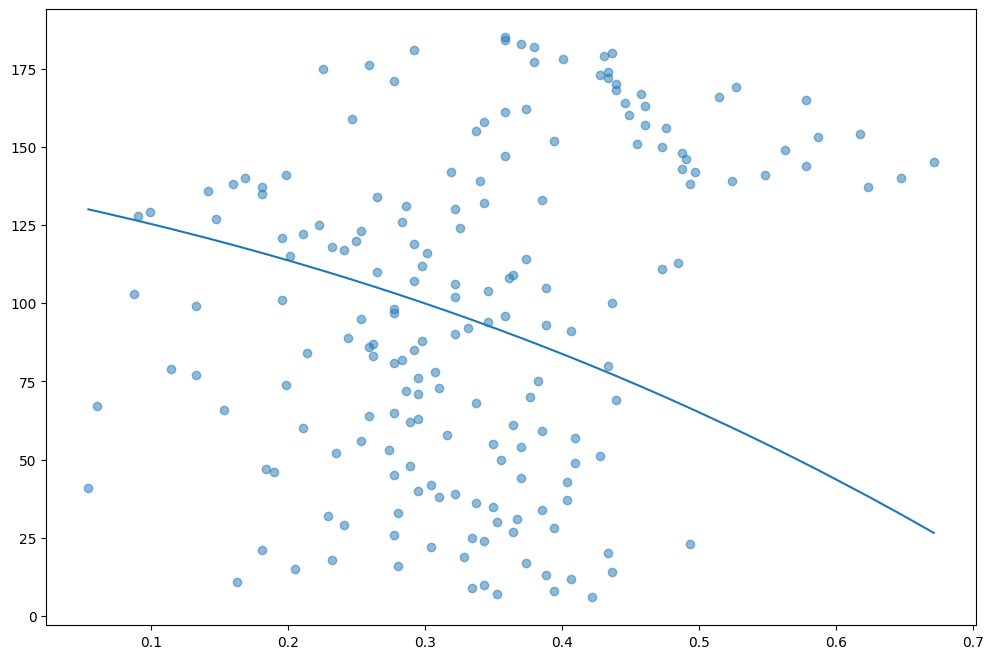

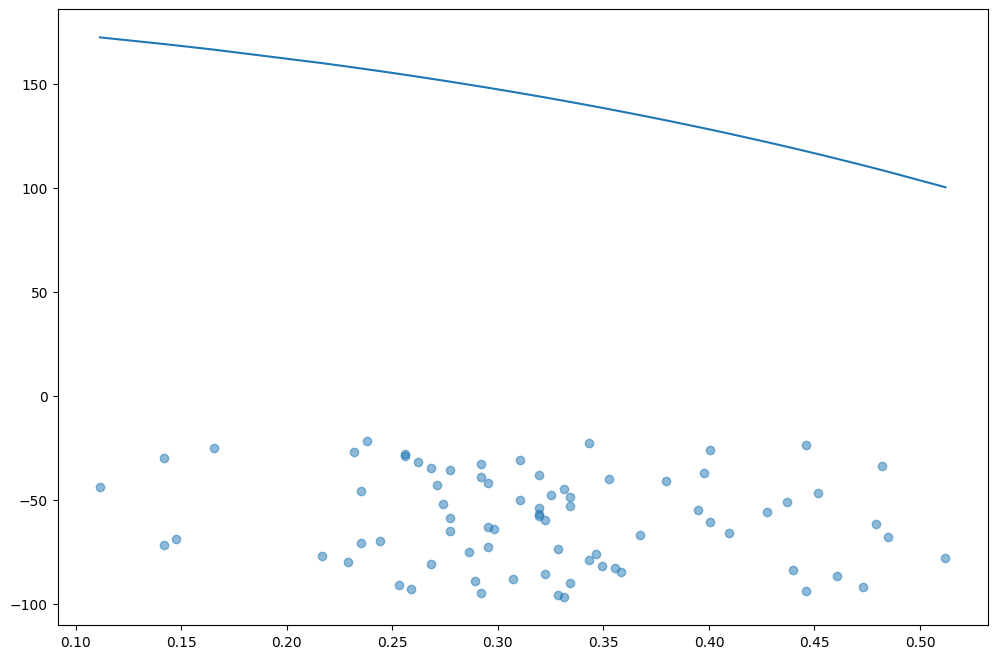

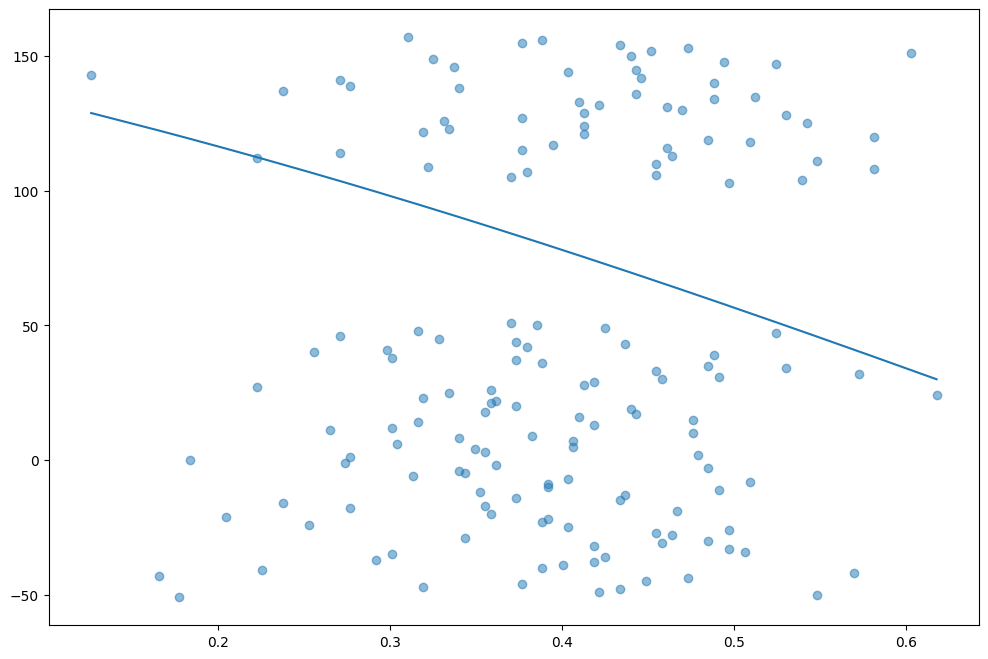

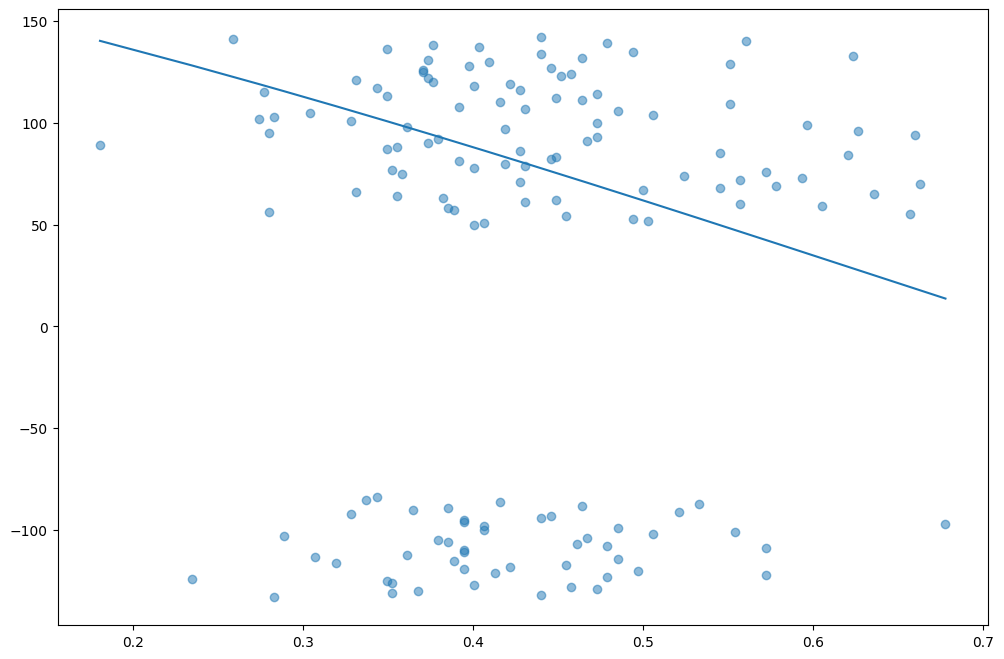

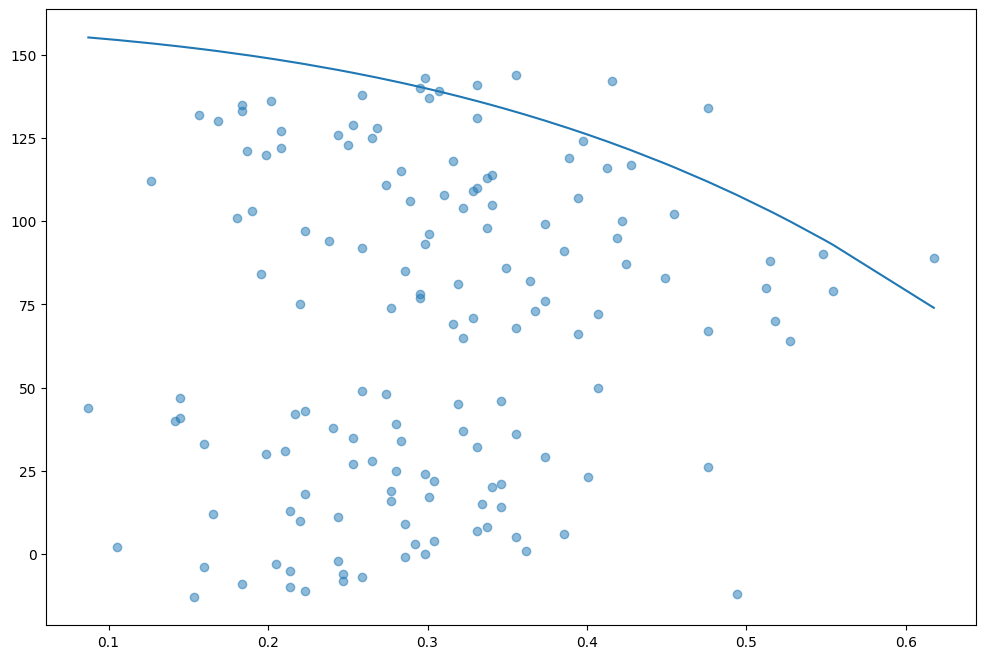

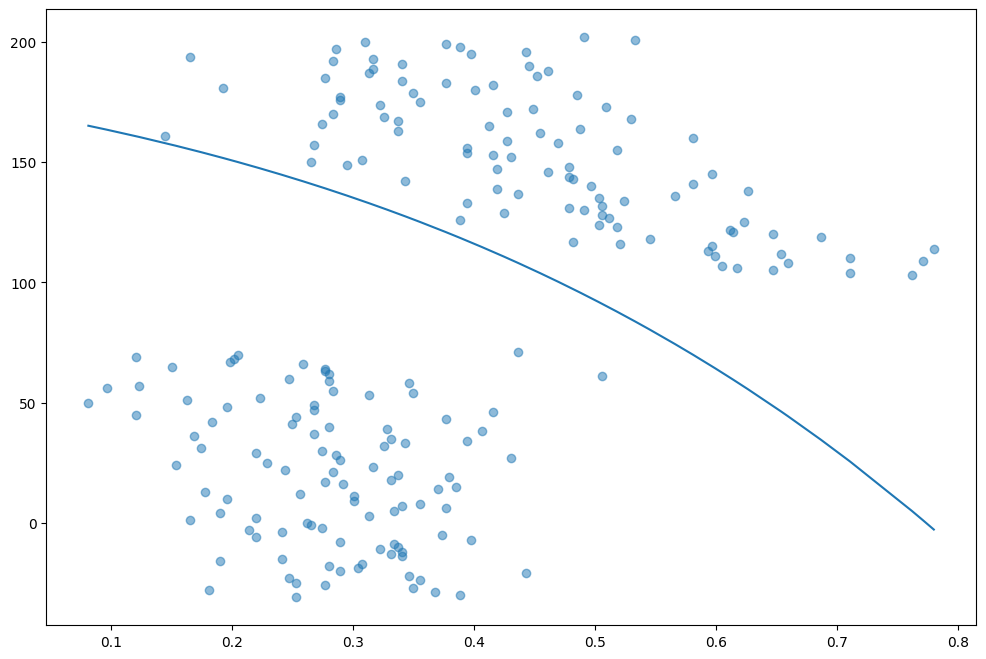

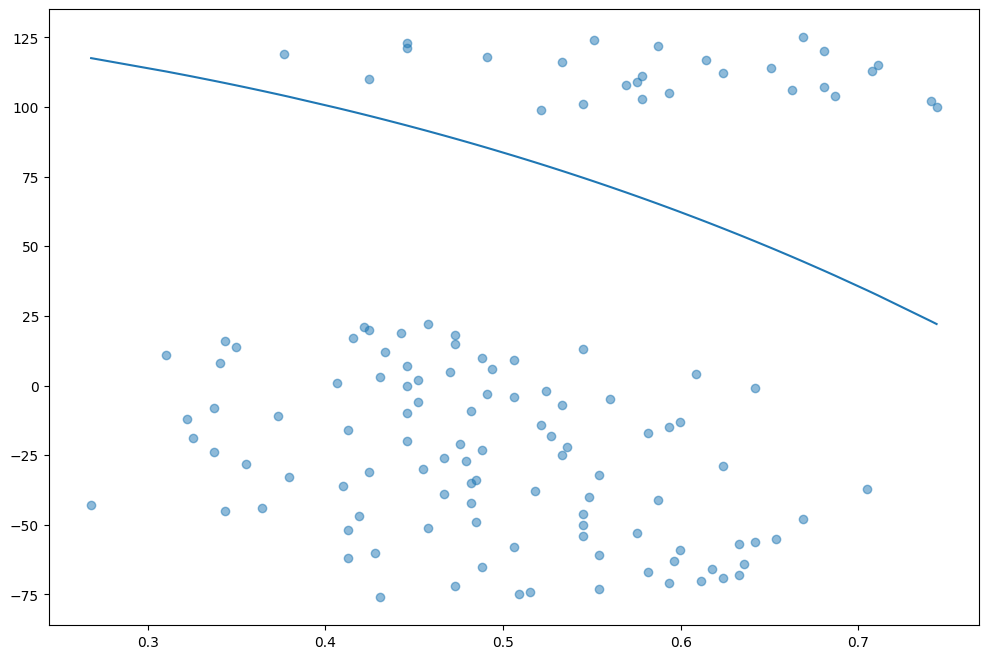

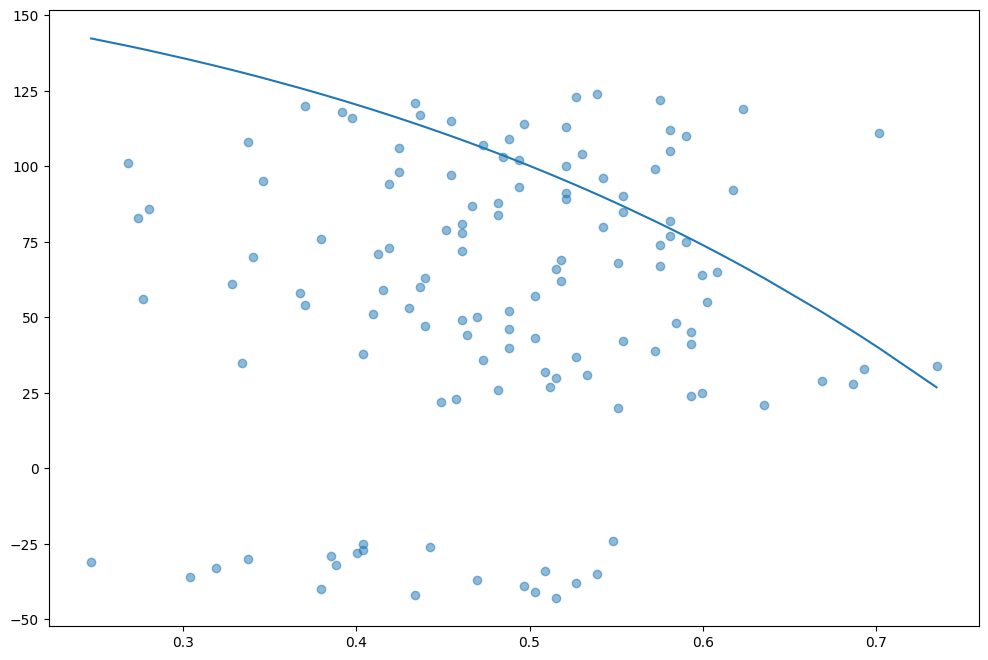

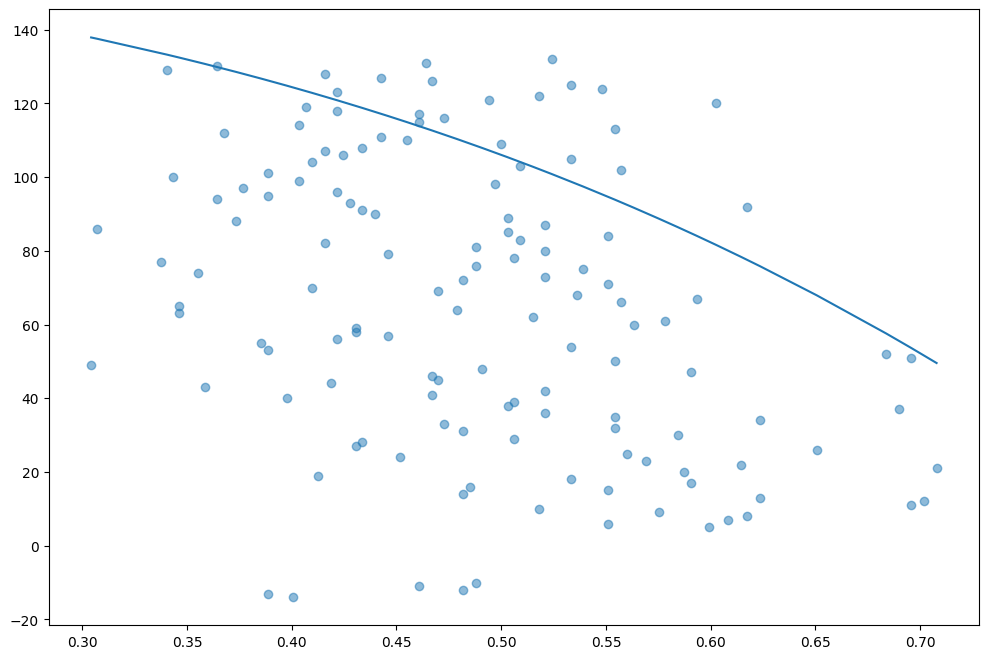

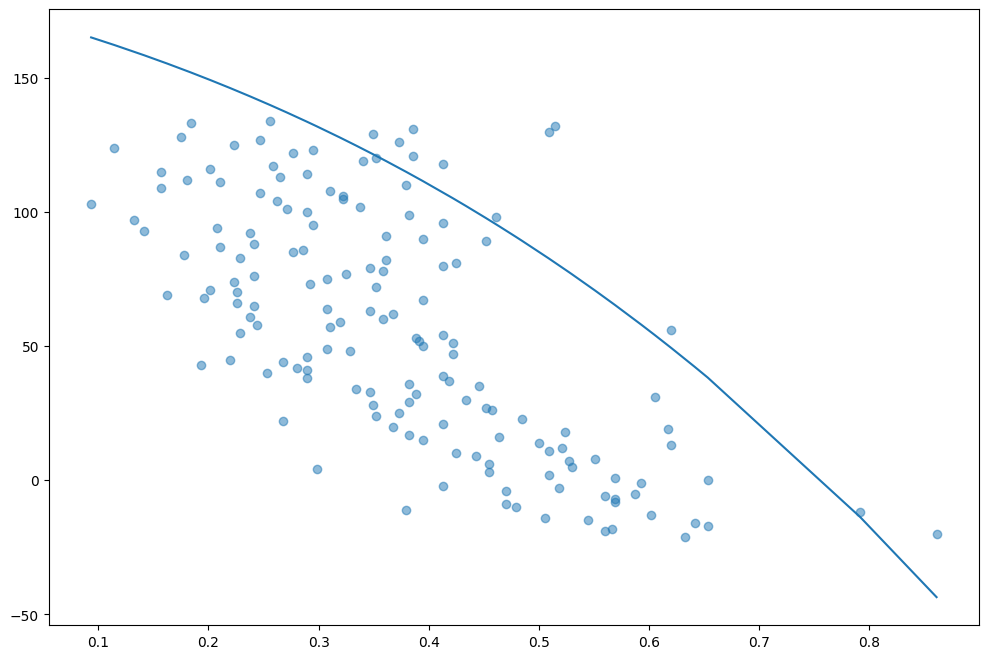

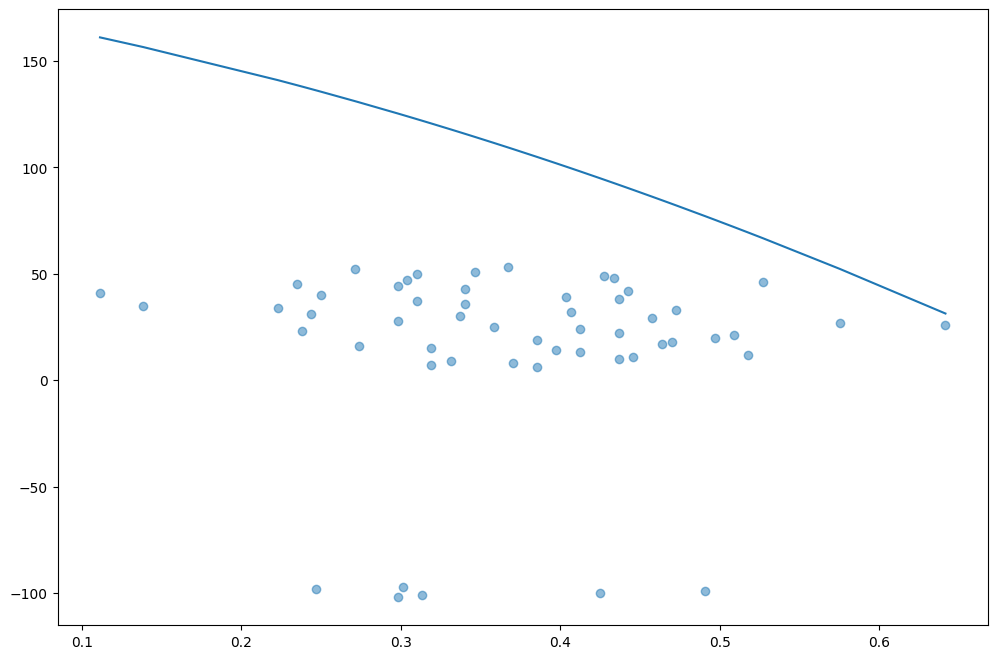

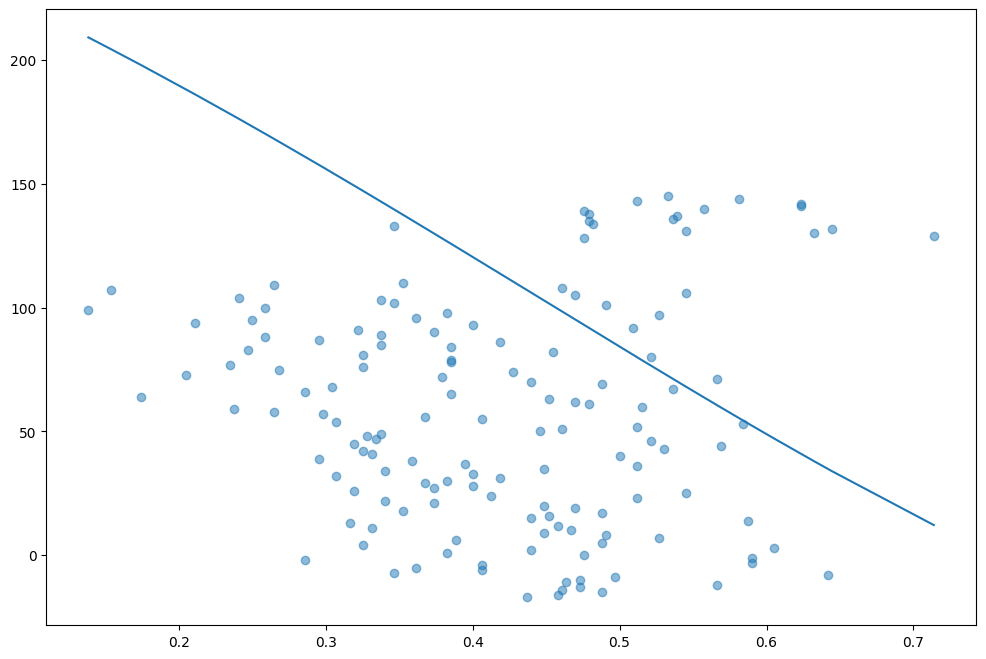

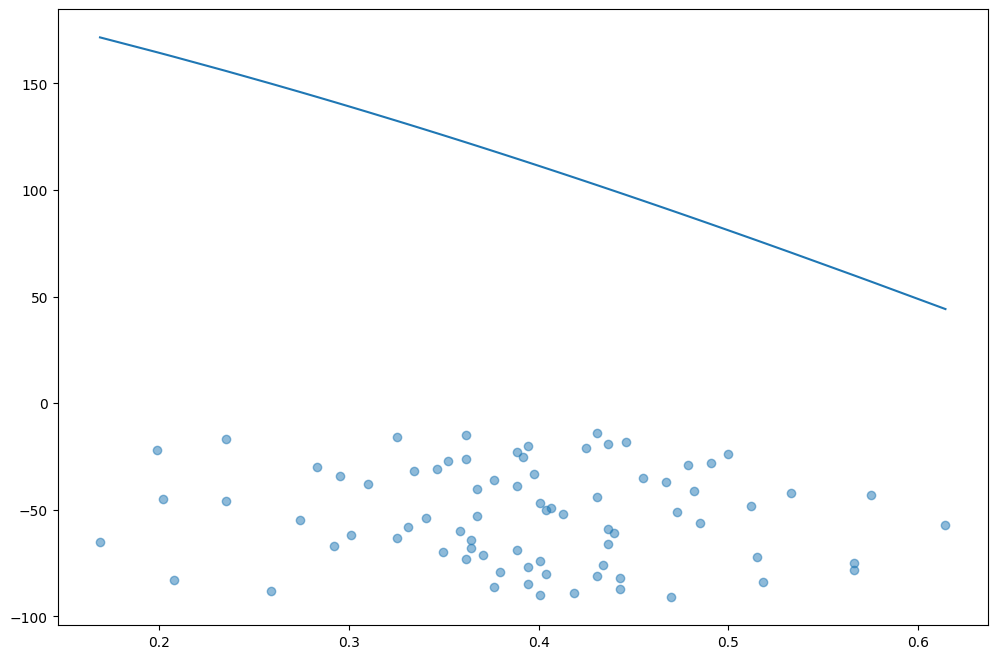

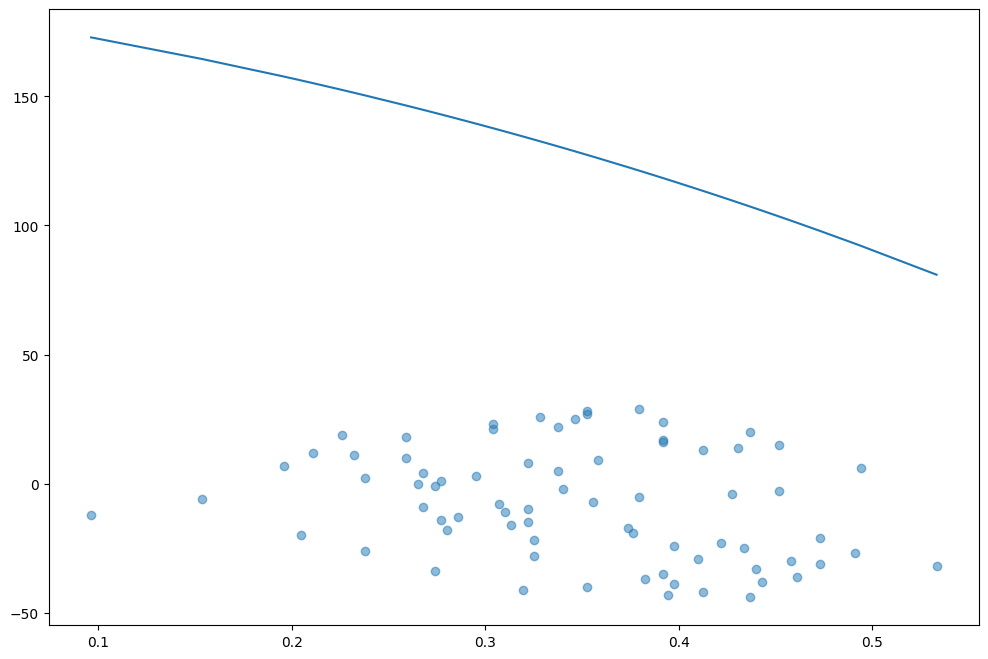

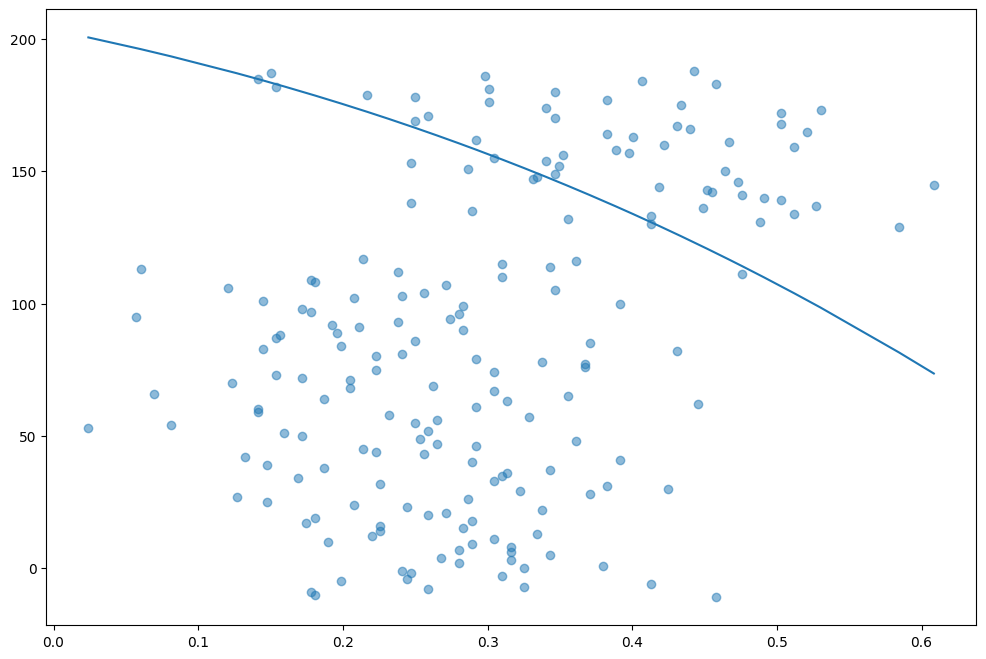

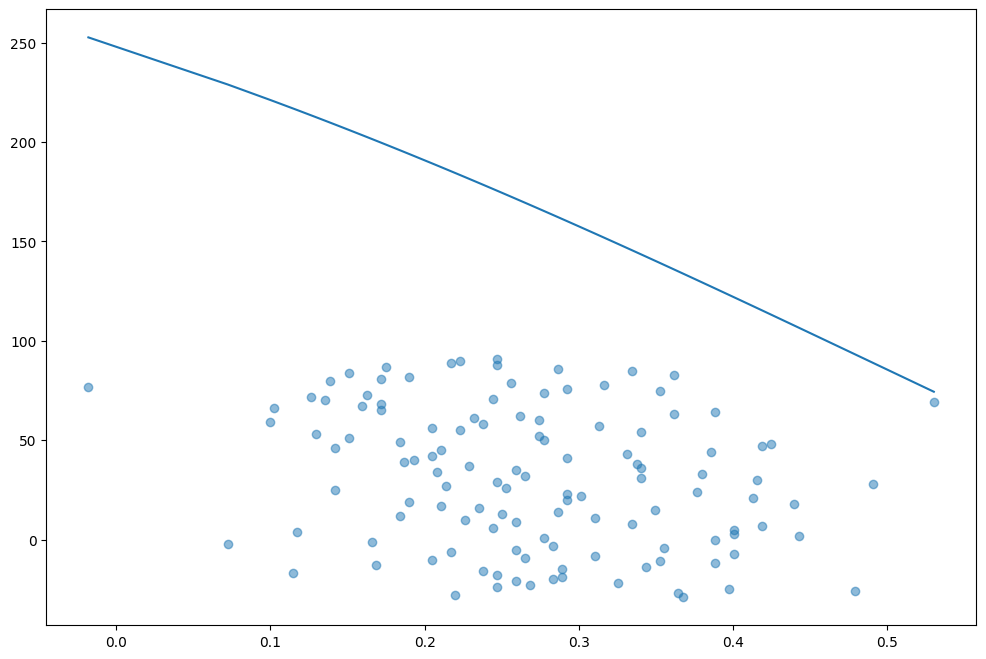

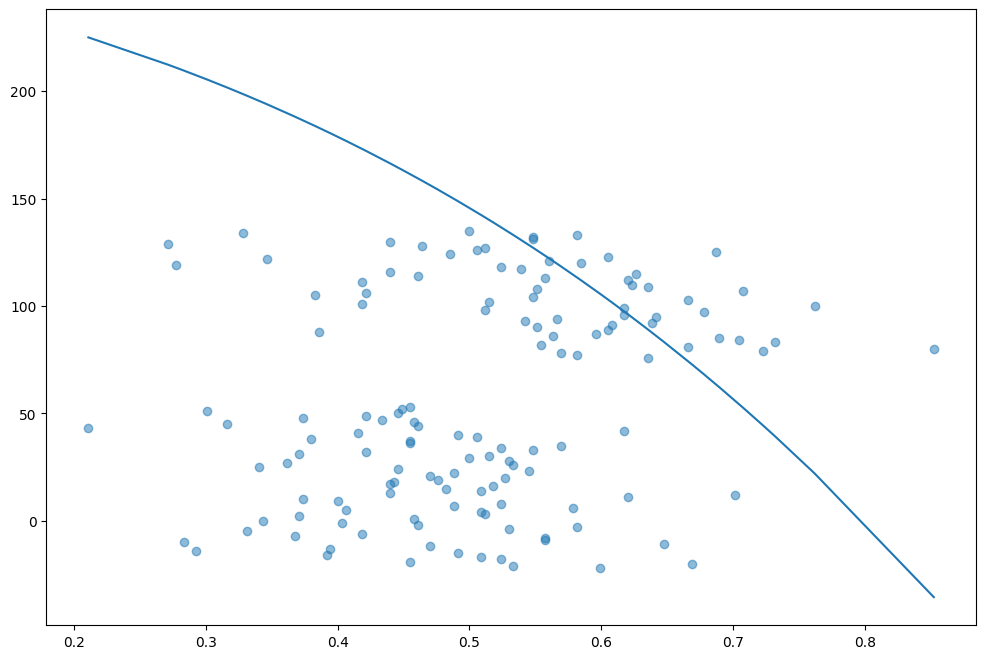

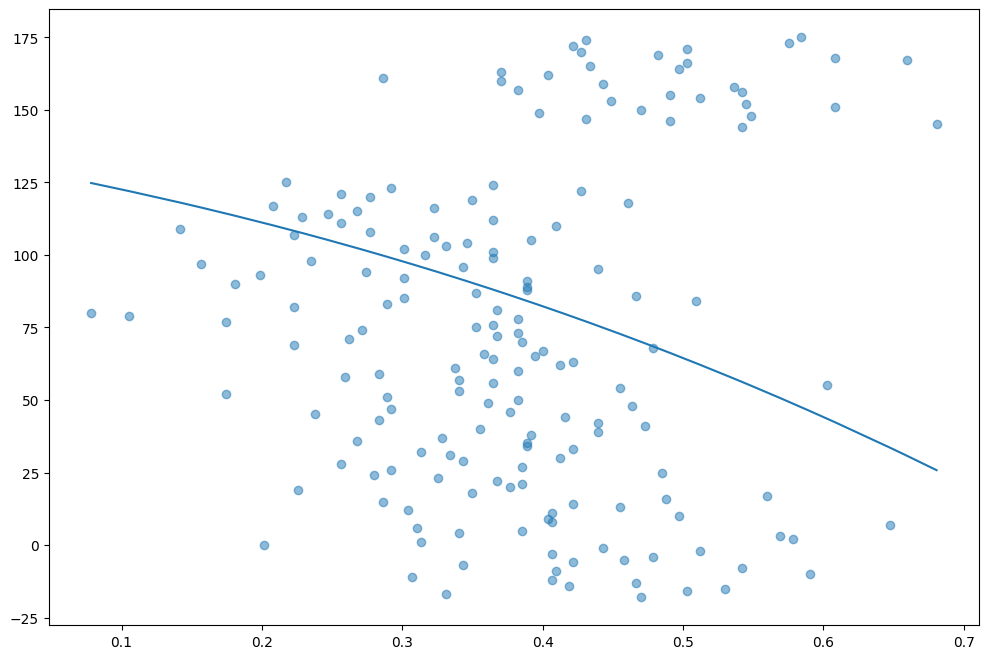

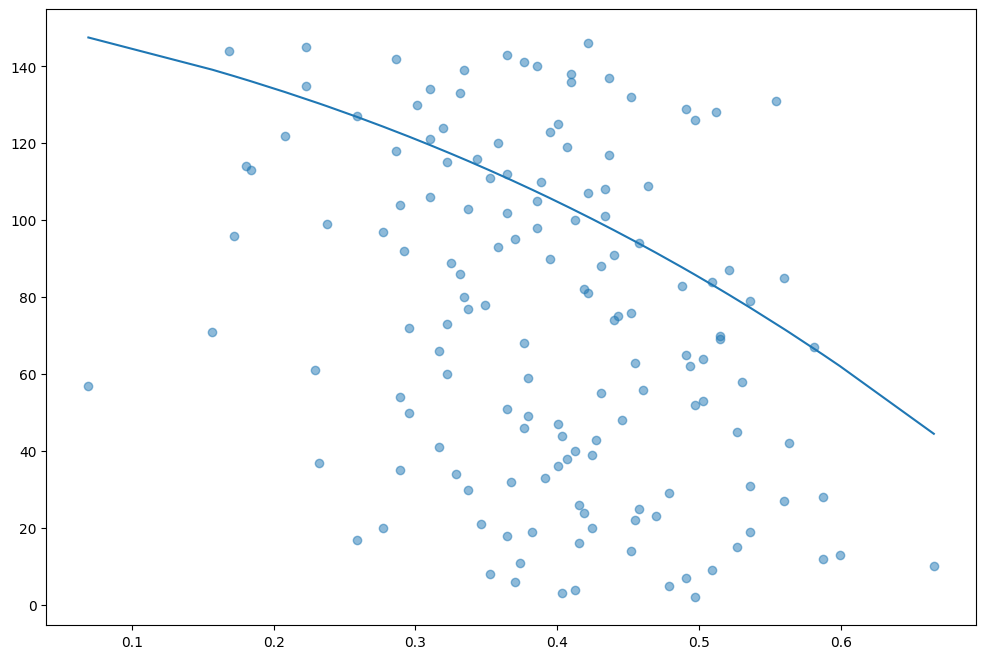

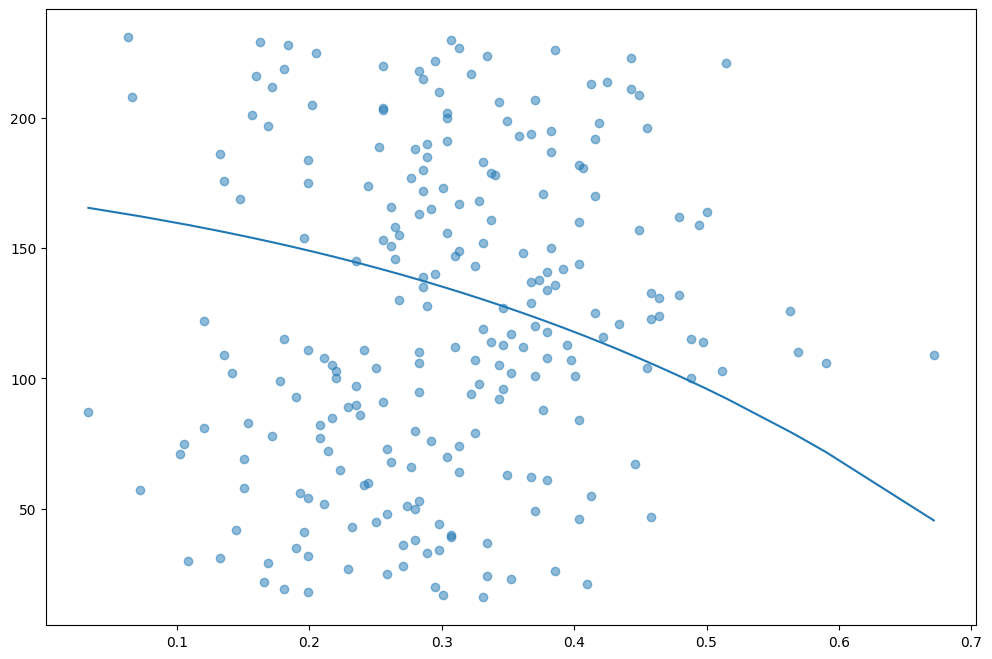

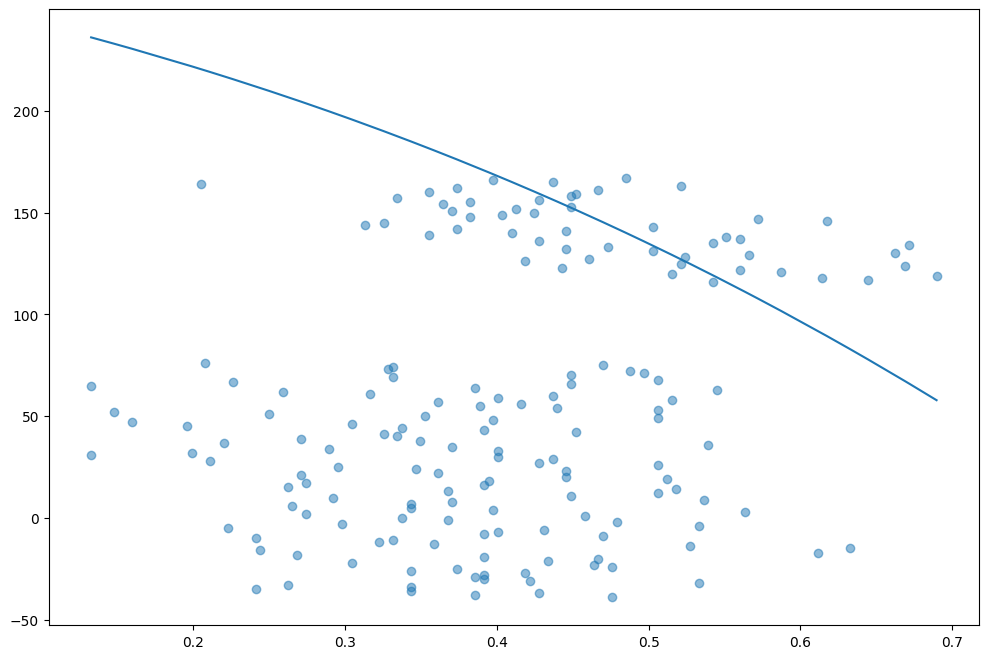

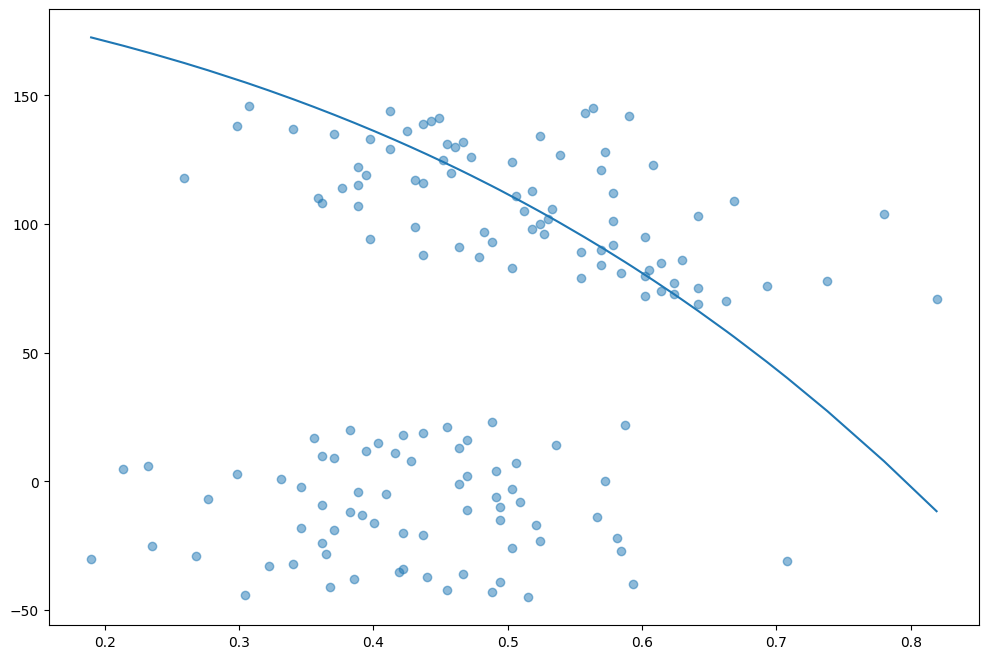

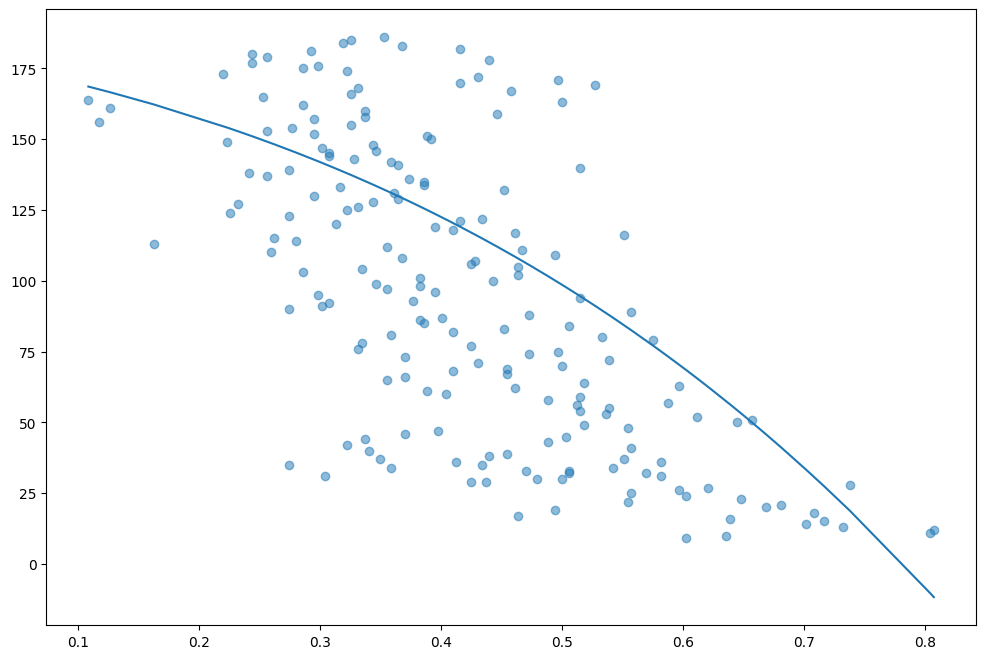

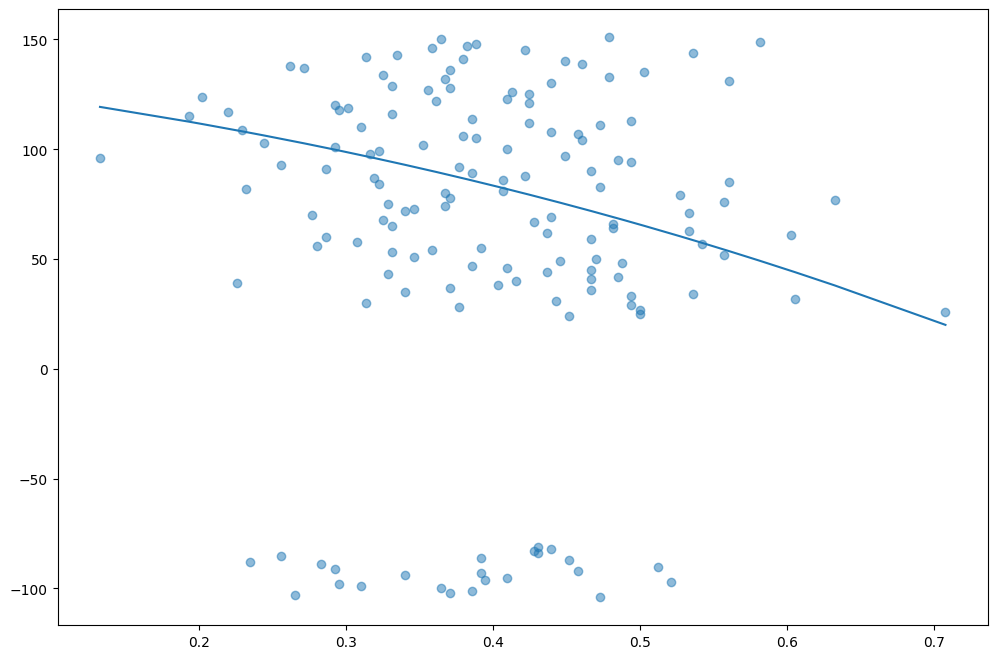

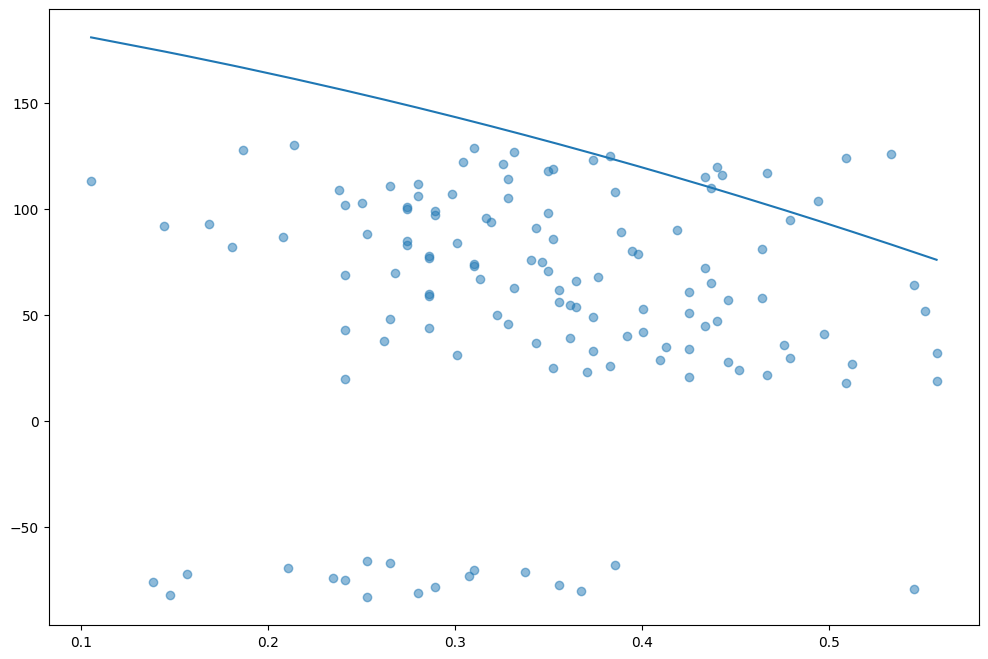

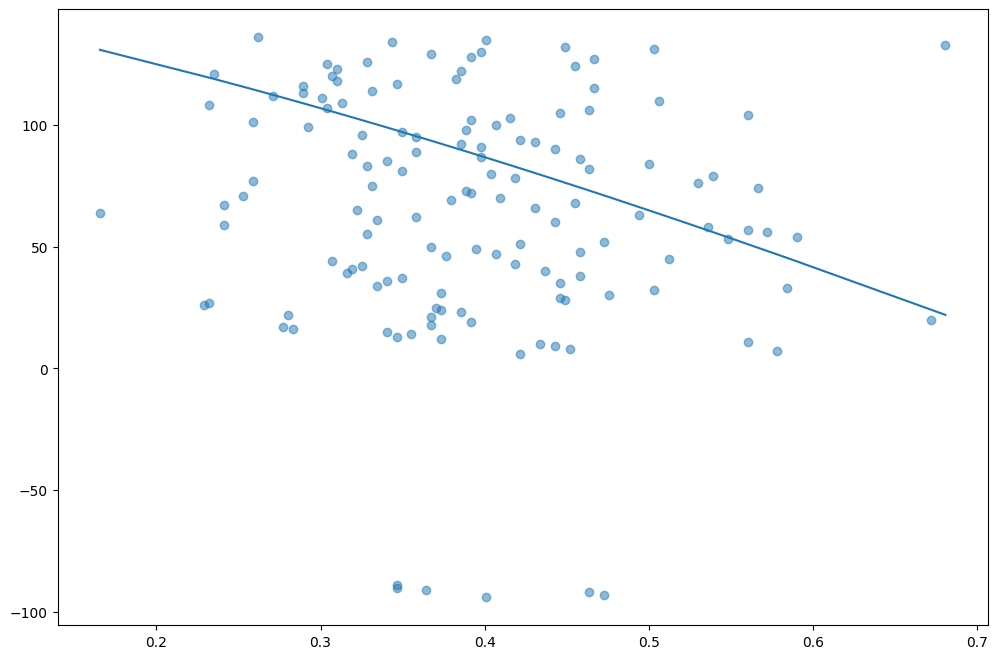

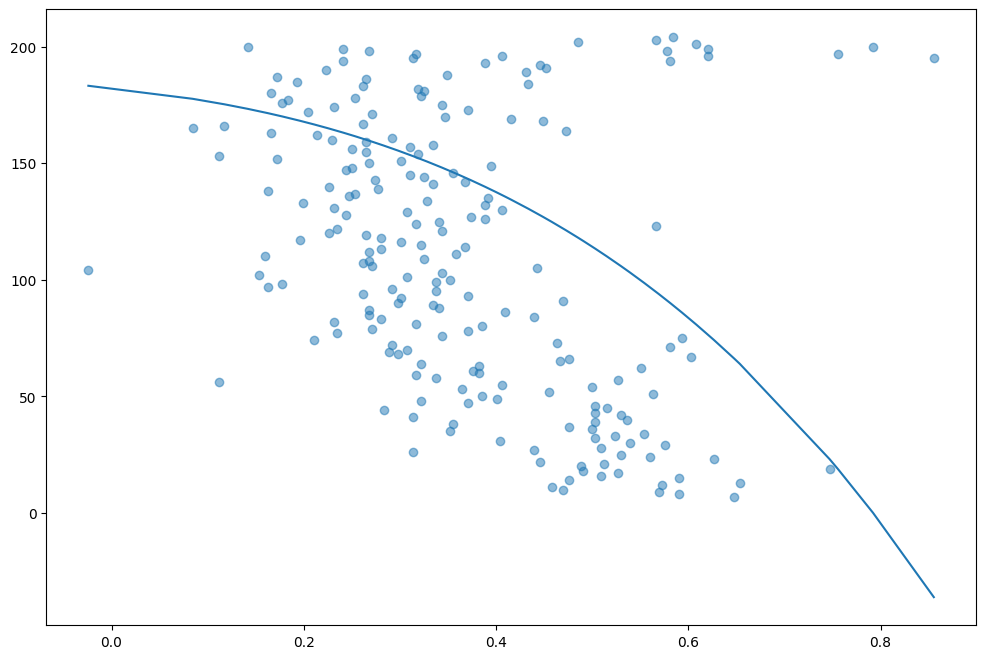

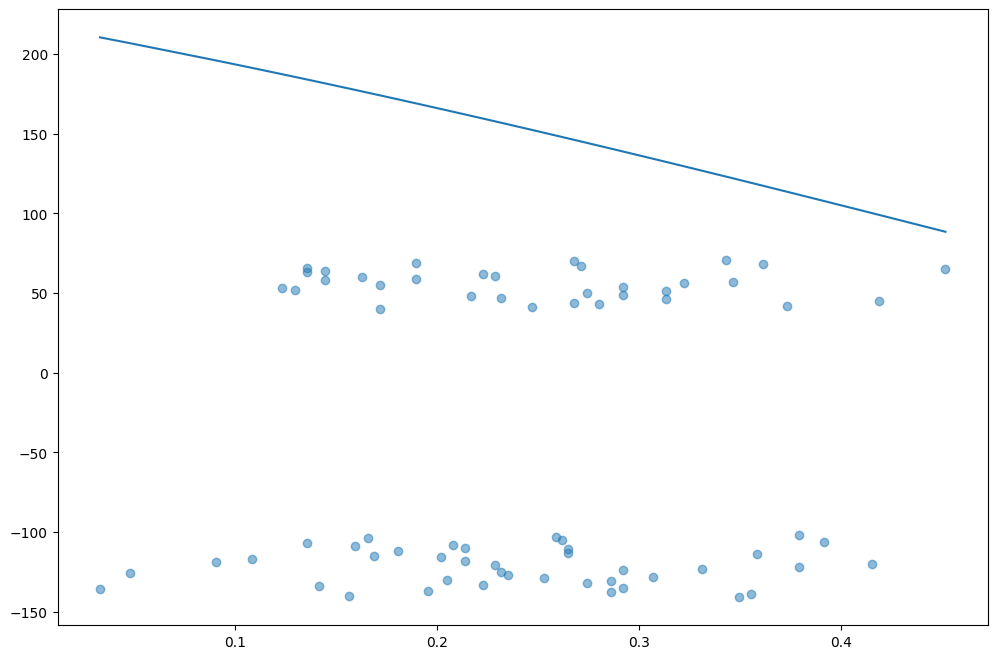

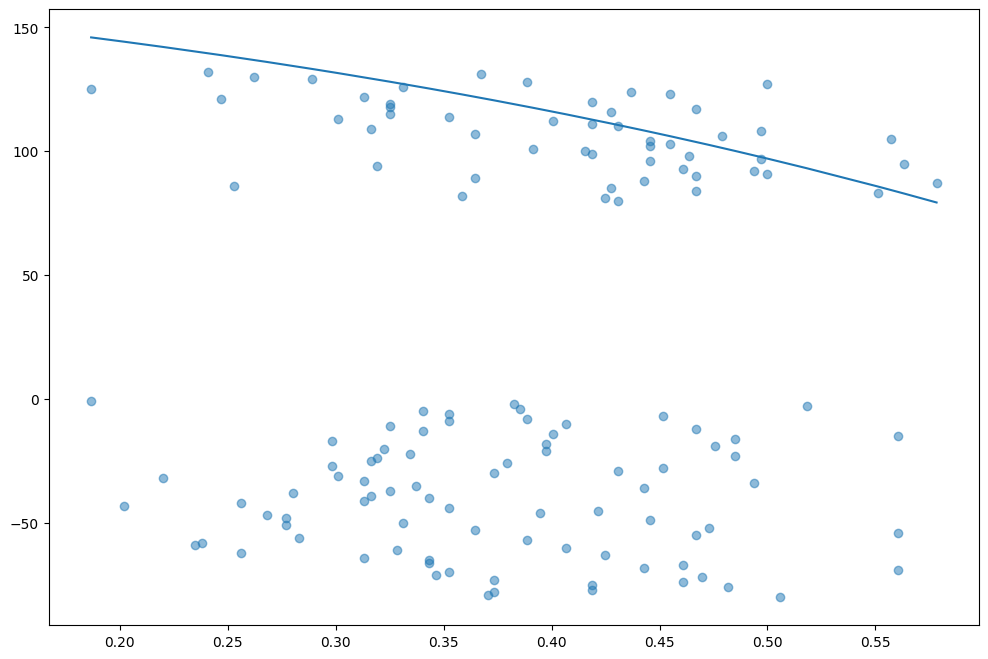

KeyboardInterrupt: 

In [101]:
mean_preds_all = []
std_preds_all = []

# Instantiate the Bayesian Regression model
blr = BayesianLinearRegression(alpha=100, beta=1/(0.05**2))

# Plotting

# Fit and predict for each engine
for engine_id in df_train_copy['id'].unique():
    if engine_id % 2 == 0:  # Plot every other engine
        # Training data
        plt.figure(figsize=(12, 8))

        df_engine_train = df_train_copy[df_train_copy['id'] == engine_id]
        X_train = df_engine_train[['s_2']].values
        y_train = df_engine_train['RUL'].values
        
        # Create polynomial features (degree 4)
        X_poly_train = np.vstack([X_train.flatten()**i for i in range(5)]).T
        
        # Test data
        df_engine_test = df_test_copy[df_test_copy['id'] == engine_id]
        X_test = df_engine_test[['s_2']].values
        y_test = df_engine_test['RUL'].values
        
        # If no test data, skip this engine
        if len(X_test) == 0:
            continue
            
        # Create polynomial features for test
        X_poly_test = np.vstack([X_test.flatten()**i for i in range(5)]).T
        
        # Set hyperparameters
        alpha = 100
        beta = 1 / (0.05 ** 2)  
        
        # Fit and predict
        blr = BayesianLinearRegression(alpha=alpha, beta=beta)
        blr.fit(X_poly_train, y_train)
        mean_pred, var_pred = blr.predict(X_poly_test)
        std_pred = np.sqrt(var_pred)
        
        # Sort for plotting
        sort_idx = np.argsort(X_test.flatten())
        X_sorted = X_test[sort_idx]
        mean_sorted = mean_pred[sort_idx]
        std_sorted = std_pred[sort_idx]
        y_sorted = y_test[sort_idx]
        
        # Plot
        plt.scatter(X_test, y_test, alpha=0.5, label=f'Engine {engine_id} Actual')
        plt.plot(X_sorted, mean_sorted, label=f'Engine {engine_id} Prediction')
        plt.fill_between(X_sorted.flatten(), 
                        mean_sorted - std_sorted, 
                        mean_sorted + std_sorted, 
                        alpha=0.2)

plt.xlabel('Sensor s_2 value')
plt.ylabel('RUL')
plt.title('Bayesian Regression: Test Set Predictions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
# Optionally average all predictions
# mean_preds_avg = np.mean(mean_preds_all, axis=0)
# std_preds_avg = np.mean(std_preds_all, axis=0)

# Plot vertical line at RUL = 30
# plt.axvline(30, color='red', linestyle='dashed', linewidth=2)

# Labels and aesthetics
plt.xlabel('Sensor 2 (s_2) value')
plt.ylabel('Remaining Useful Life (RUL)')
plt.title('Bayesian Linear Regression: RUL Prediction with Uncertainty')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.show()

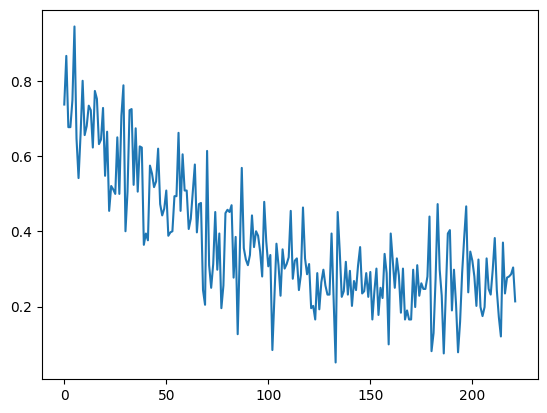

In [102]:
df_engine = df_train_copy[df_train_copy['id'] == 10]
df_engine_test = df_test_copy[df_test_copy['id'] == 10]
X_engine = df_engine[['s_2']].values
np.shape(X_engine)
plt.plot('RUL', sensor_name, 
        data=df_engine, alpha = 1, label = f'Engine {i}')

